# <font color="red"><p align="center">📌 Inferential Statistical Analysis</p></font>
<p align="center">Hypothesis 3</p1>

In [88]:
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns  
import math    
from scipy.stats import chi2_contingency  
from wordcloud import WordCloud  
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
from scipy.stats import kruskal

import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel



In [89]:
file_path = "df_cleaned.xlsx"
df_hy3 = pd.read_excel(file_path)

In [90]:
pd.set_option('display.max_columns', None)  # for showing all columns
pd.set_option('display.expand_frame_repr', False)  # this prevent wrapping to new lines
print(df_hy3.head())

  Age_Range  Gender Occupation    Hometown Aware_Shutdown Internet_Usage_BS Internet_Reliance_BS IS_Affect_Daily_Routine Change_Digital_Dependency Reconsider_Offline_Alternatives Justify_Shutdown_in_Certain_Situation S_Limit_Freedom_of_Speech Shutdown_Effectiveness_in_GIP Future_Acceptance_of_S_for_NS Protest_Hindrance_AG Future_Civic_Engagement_if_ASO     ISLAC_Protest_CM Primary_Communication_Mode_BS Comm_Disruption_due_to_S Social_Media_Usage_Change_AS Switch_Alt_Comm_Methods_DS News_Reliance_on_Internet_BS Mental_Impact_of_S                               Coping_Strategy_DS     Lasting_Impact_on_MH        CORS_on_National_Stability          Democracy_Perception_if_SDOA ISR_in_GPC_in_Bang
0     18-29  Female    Student  Chattogram            Yes         2-4 hours             A little                      No                 No change                              No                               Neutral                Not at all                       Neutral                       Neutr

#### ✅ Step 5: Hypothesis (3) Testing

In [91]:
"""
Impact of Repeated Internet Shutdowns on Government Stability and Public Trust
  Null Hypothesis (H₀): Internet shutdowns have no significant impact on public perception of government stability or trust in governance.
  Alternative Hypothesis (H₁): Internet shutdowns impact public perception of government stability or trust in governance.

  🔹 Variables:
        • Independent Variable: Justify_Shutdown_in_Certain_Situation
                                Shutdown_Effectiveness_in_GIP 
                                S_Limit_Freedom_of_Speech 
                                Protest_Hindrance_AG
                                Future_Civic_Engagement_if_ASO
                                ISLAC_Protest_CM
                                Comm_Disruption_due_to_S
                                News_Reliance_on_Internet_BS
                                Social_Media_Usage_Change_AS
        • Dependent Variable:   CORS_on_National_Stability
                                Democracy_Perception_if_SDOA
                                ISR_in_GPC_in_Bang
"""

'\nImpact of Repeated Internet Shutdowns on Government Stability and Public Trust\n  Null Hypothesis (H₀): Internet shutdowns have no significant impact on public perception of government stability or trust in governance.\n  Alternative Hypothesis (H₁): Internet shutdowns impact public perception of government stability or trust in governance.\n\n  🔹 Variables:\n        • Independent Variable: Justify_Shutdown_in_Certain_Situation\n                                Shutdown_Effectiveness_in_GIP \n                                S_Limit_Freedom_of_Speech \n                                Protest_Hindrance_AG\n                                Future_Civic_Engagement_if_ASO\n                                ISLAC_Protest_CM\n                                Comm_Disruption_due_to_S\n                                News_Reliance_on_Internet_BS\n                                Social_Media_Usage_Change_AS\n        • Dependent Variable:   CORS_on_National_Stability\n                              

5.1: Association Testing: Chi-Square Test & Bonferroni Correction

###### 5.1.1: Data Assumption Check (Verify Expected Frequencies (≥5) for Chi-square Test)

In [92]:
dependent_vars = [
    'CORS_on_National_Stability',
    'Democracy_Perception_if_SDOA',
    'ISR_in_GPC_in_Bang'
]

independent_vars = [
    'Justify_Shutdown_in_Certain_Situation',
    'Shutdown_Effectiveness_in_GIP',
    'S_Limit_Freedom_of_Speech',
    'Protest_Hindrance_AG',
    'Future_Civic_Engagement_if_ASO',
    'ISLAC_Protest_CM',
    'Comm_Disruption_due_to_S',
    'News_Reliance_on_Internet_BS',
    'Social_Media_Usage_Change_AS'   
]

# Function to check expected frequencies
def check_expected_frequencies(df, dep_var, indep_var):
    contingency_table = pd.crosstab(df[dep_var], df[indep_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    expected_df = pd.DataFrame(expected,
                               index=contingency_table.index,
                               columns=contingency_table.columns)
    below_5 = (expected_df < 5).sum().sum()
    print(f"\n✅ Checking Pair: {dep_var} ↔ {indep_var}")
    print("="*100)
    print("Contingency Table:\n", contingency_table)
    print("\nExpected Frequencies:\n", expected_df.round(2))
    if below_5 > 0:
        print(f"\n⚠️ Warning: {below_5} cells have expected frequencies below 5. Consider merging categories.\n")
    else:
        print("✅ All expected frequencies ≥ 5. Good to proceed.\n")


# Loop through all pairs and check assumptions
for dep in dependent_vars:
    for indep in independent_vars:
        check_expected_frequencies(df_hy3, dep, indep)


✅ Checking Pair: CORS_on_National_Stability ↔ Justify_Shutdown_in_Certain_Situation
Contingency Table:
 Justify_Shutdown_in_Certain_Situation  Agree  Disagree  Neutral  Strongly agree  Strongly disagree
CORS_on_National_Stability                                                                        
Improved stability                        76        19       20              22                 11
Increased unrest and instability         142       252      132              30                156
No effect on stability                    38        25       38              12                 14
Not sure                                  50        19       49              12                 16
Potential for a government collapse       22        33       27               8                 44

Expected Frequencies:
 Justify_Shutdown_in_Certain_Situation   Agree  Disagree  Neutral  Strongly agree  Strongly disagree
CORS_on_National_Stability                                                    

In [93]:
# CORS_on_National_Stability
df_hy3['CORS_on_National_Stability'] = df_hy3['CORS_on_National_Stability'].replace({
    "Potential for a government collapse": "Increased unrest and instability",
    "Improved stability": "No effect on stability"
})

# Democracy_Perception_if_SDOA
df_hy3['Democracy_Perception_if_SDOA'] = df_hy3['Democracy_Perception_if_SDOA'].replace({
    "More trust in government actions": "No change",
    "More activism against the government": "More distrust in government actions"
})

# ISR_in_GPC_in_Bang
df_hy3['ISR_in_GPC_in_Bang'] = df_hy3['ISR_in_GPC_in_Bang'].replace({
    "A little": "Moderately",
    "Extremely": "Moderately"
})

# Justify_Shutdown_in_Certain_Situation
df_hy3['Justify_Shutdown_in_Certain_Situation'] = df_hy3['Justify_Shutdown_in_Certain_Situation'].replace({
    "Strongly agree": "Agree",
    "Strongly disagree": "Disagree"
})

# Shutdown_Effectiveness_in_GIP
df_hy3['Shutdown_Effectiveness_in_GIP'] = df_hy3['Shutdown_Effectiveness_in_GIP'].replace({
    "Very effective": "Somewhat effective",
    "Very ineffective": "Ineffective"
})

# S_Limit_Freedom_of_Speech
df_hy3['S_Limit_Freedom_of_Speech'] = df_hy3['S_Limit_Freedom_of_Speech'].replace({
    "Extremely": "Moderately",
    "Not at all": "A little"
})

# Protest_Hindrance_AG
df_hy3['Protest_Hindrance_AG'] = df_hy3['Protest_Hindrance_AG'].replace({
    "Completely": "Moderately",
    "Not at all": "A little"
})

# Future_Civic_Engagement_if_ASO
df_hy3['Future_Civic_Engagement_if_ASO'] = df_hy3['Future_Civic_Engagement_if_ASO'].replace({
    "Definitely yes": "Probably yes",
    "Definitely no": "Probably no"
})

# ISLAC_Protest_CM
df_hy3['ISLAC_Protest_CM'] = df_hy3['ISLAC_Protest_CM'].replace({
    "Complete limitation": "Moderate limitation",
    "No limitation": "None"
})

# Comm_Disruption_due_to_S
df_hy3['Comm_Disruption_due_to_S'] = df_hy3['Comm_Disruption_due_to_S'].replace({
    "Severely disrupted": "Somewhat disrupted"
})

# News_Reliance_on_Internet_BS
df_hy3['News_Reliance_on_Internet_BS'] = df_hy3['News_Reliance_on_Internet_BS'].replace({
    "Very reliant": "Slightly reliant",
    "Not reliant at all": "None"
})

# Social_Media_Usage_Change_AS
df_hy3['Social_Media_Usage_Change_AS'] = df_hy3['Social_Media_Usage_Change_AS'].replace({
    "Increased significantly": "Increased somewhat",
    "Stopped completely": "Decreased somewhat"
})

print("Dataset updated and saved as df_cleaned_updated.xlsx")


Dataset updated and saved as df_cleaned_updated.xlsx


In [94]:
df_hy3['Social_Media_Usage_Change_AS'].value_counts()

Social_Media_Usage_Change_AS
Stayed the same       500
Increased somewhat    413
Decreased somewhat    354
Name: count, dtype: int64

In [95]:
# Loop through all pairs and check assumptions
for dep in dependent_vars:
    for indep in independent_vars:
        check_expected_frequencies(df_hy3, dep, indep)


✅ Checking Pair: CORS_on_National_Stability ↔ Justify_Shutdown_in_Certain_Situation
Contingency Table:
 Justify_Shutdown_in_Certain_Situation  Agree  Disagree  Neutral
CORS_on_National_Stability                                     
Increased unrest and instability         202       485      159
No effect on stability                   148        69       58
Not sure                                  62        35       49

Expected Frequencies:
 Justify_Shutdown_in_Certain_Situation   Agree  Disagree  Neutral
CORS_on_National_Stability                                      
Increased unrest and instability       275.10    393.29   177.61
No effect on stability                  89.42    127.84    57.73
Not sure                                47.48     67.87    30.65
✅ All expected frequencies ≥ 5. Good to proceed.


✅ Checking Pair: CORS_on_National_Stability ↔ Shutdown_Effectiveness_in_GIP
Contingency Table:
 Shutdown_Effectiveness_in_GIP     Ineffective  Neutral  Somewhat effective
CORS

###### 5.1.2: Perform Chi-square Test of Independence

In [96]:
results = []

for dep in dependent_vars:
    for indep in independent_vars:
        contingency_table = pd.crosstab(df_hy3[dep], df_hy3[indep])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Bias-corrected Cramér’s V calculation
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
        rcorr = r - ((r - 1)**2) / (n - 1)
        kcorr = k - ((k - 1)**2) / (n - 1)
        cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

        # Append results clearly
        results.append({
            'Dependent Variable': dep,
            'Independent Variable': indep,
            'Chi-square Statistic': round(chi2, 4),
            'Degrees of Freedom': dof,
            'P-value': round(p, 4),
            'Effect Size (Bias-Corrected Cramér’s V)': round(cramers_v, 4),
            'Significance': 'Significant ✅' if p < 0.05 else 'Not Significant ❌'
        })

chi_square_results_df_corrected = pd.DataFrame(results)

print("\nChi-square Test Summary Table (Bias-Corrected Cramér’s V):")
print("===============================================================")
print(chi_square_results_df_corrected)


Chi-square Test Summary Table (Bias-Corrected Cramér’s V):
              Dependent Variable                   Independent Variable  Chi-square Statistic  Degrees of Freedom  P-value  Effect Size (Bias-Corrected Cramér’s V)       Significance
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation              139.5632                   4   0.0000                                   0.2315      Significant ✅
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP               58.4088                   4   0.0000                                   0.1466      Significant ✅
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech              128.2378                   2   0.0000                                   0.3158      Significant ✅
3     CORS_on_National_Stability                   Protest_Hindrance_AG               78.9141                   2   0.0000                                   0.2465      Significant ✅
4     CORS_on_National_St

###### 5.1.3: Interpret Results in Simple words

In [97]:
"""
📌 Summary of Key Findings:
1. Shutdowns significantly impact trust in democracy and perceived government stability.
2. Restrictions on freedom of speech and protests strongly 
    correlate with negative perceptions of government actions.
3. People do not strongly believe that internet shutdowns influence government policy-making.
4. Access to alternative communication methods can reduce the perceived impact of shutdowns.
"""

'\n📌 Summary of Key Findings:\n1. Shutdowns significantly impact trust in democracy and perceived government stability.\n2. Restrictions on freedom of speech and protests strongly \n    correlate with negative perceptions of government actions.\n3. People do not strongly believe that internet shutdowns influence government policy-making.\n4. Access to alternative communication methods can reduce the perceived impact of shutdowns.\n'

###### 5.1.4: Visualization

###### 5.1.4.1: Clustered Column Chart (shows distributions clearly)

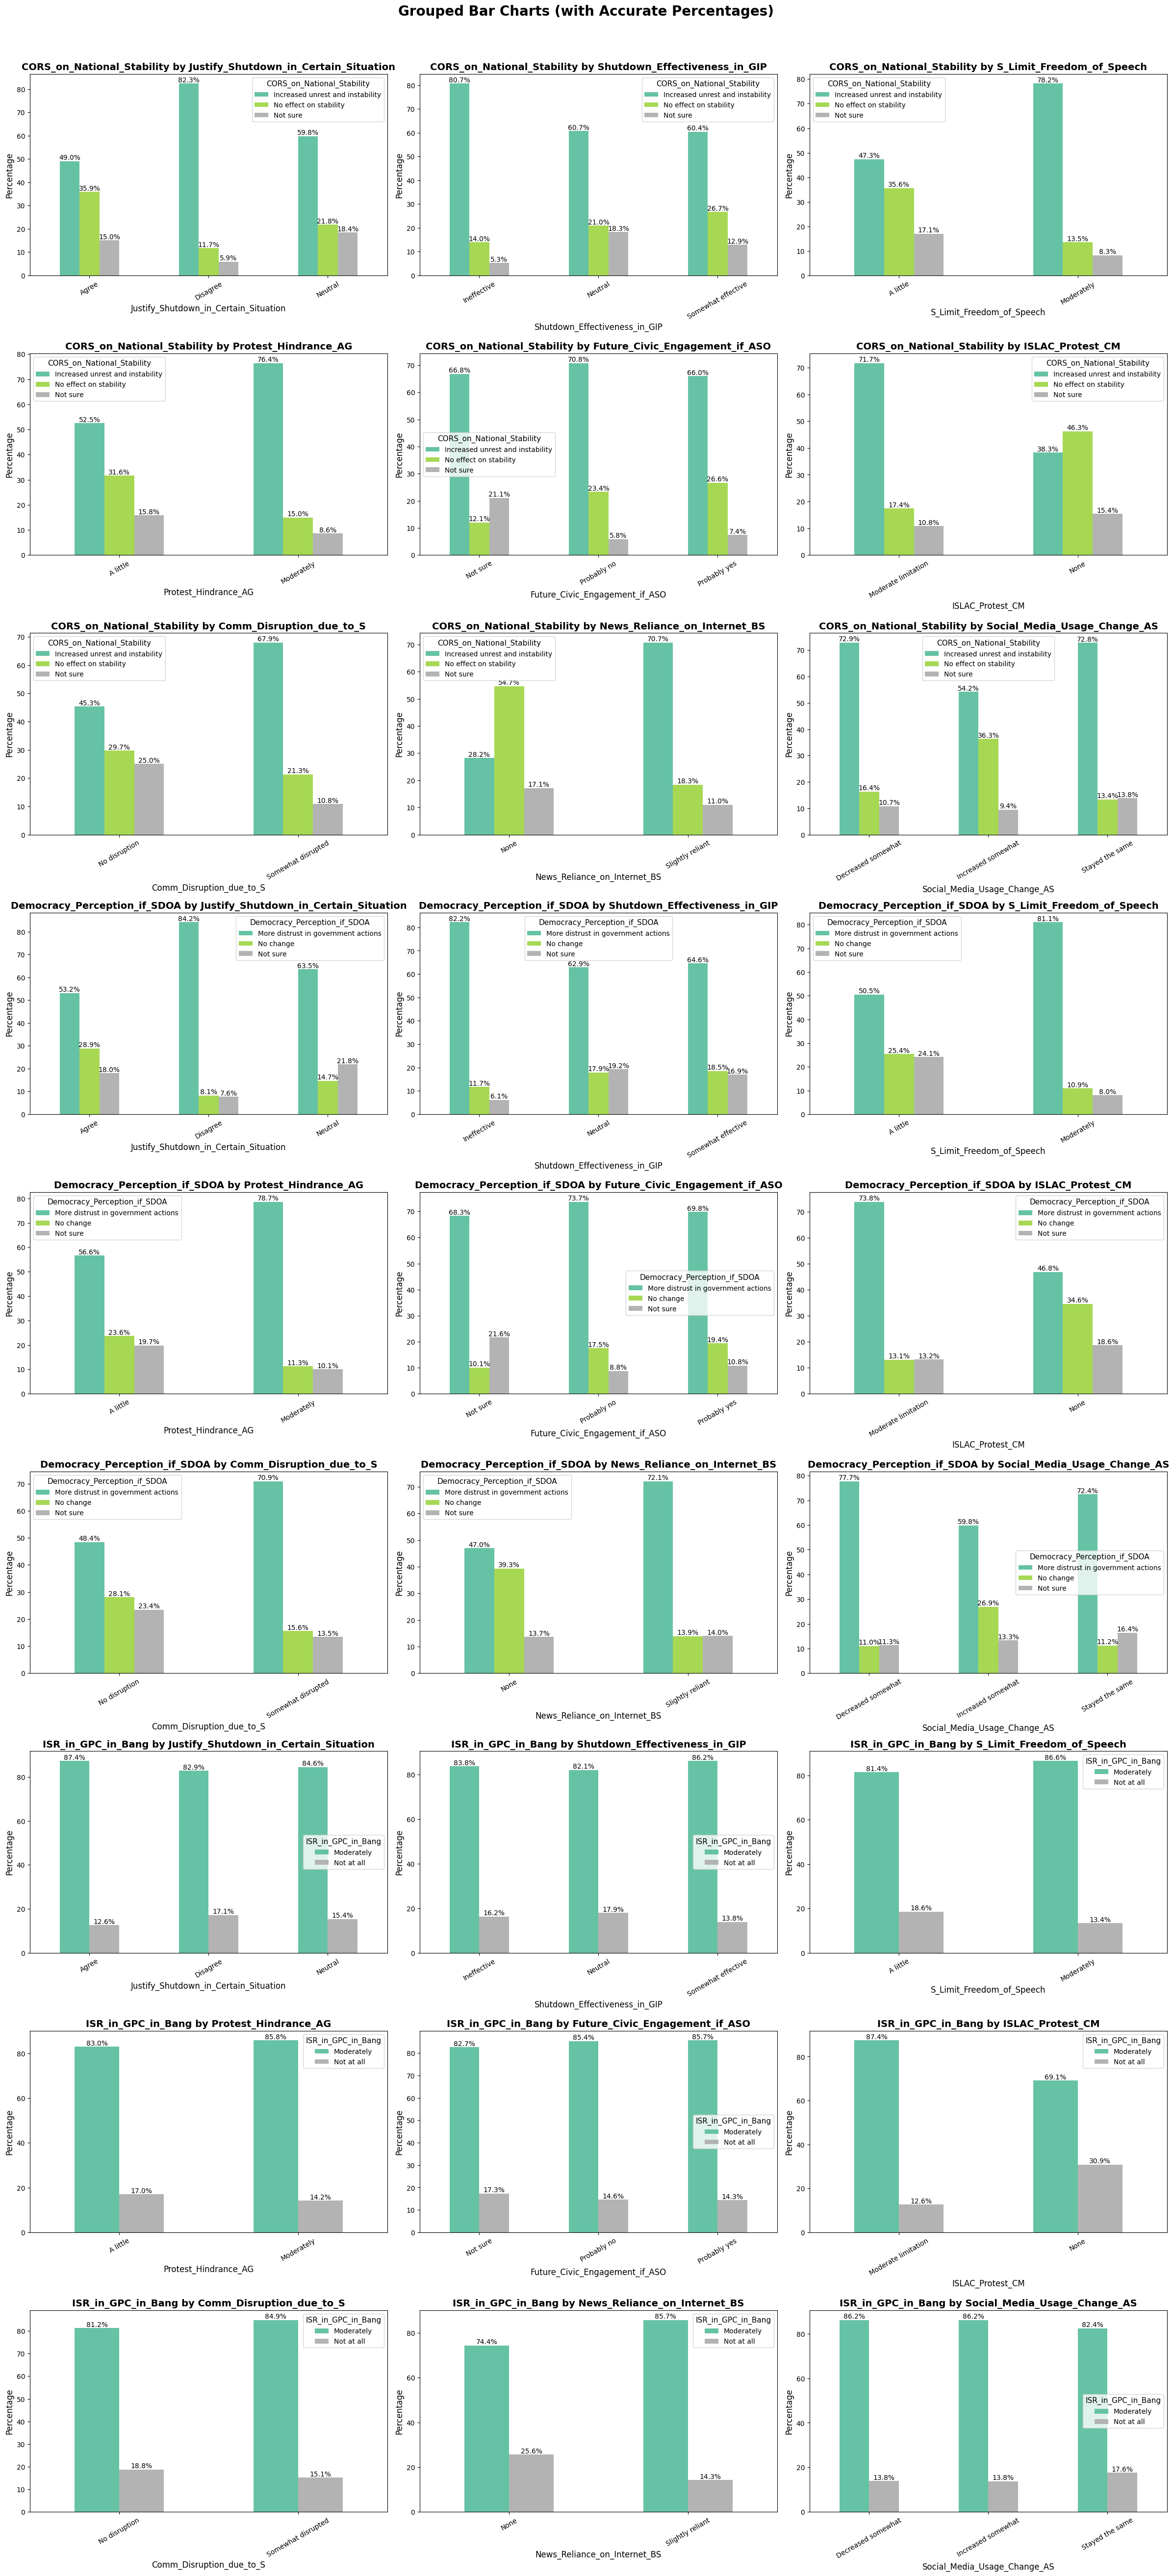

In [98]:
import matplotlib.pyplot as plt

# Define all variable pairs for the hypothesis
all_pairs = [(dep, indep) for dep in dependent_vars for indep in independent_vars]

# Setup subplot grid dimensions dynamically
rows, cols = (len(all_pairs) // 3) + 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(24, rows * 6))
axes = axes.flatten()

# Function to plot grouped bar charts with accurate percentages
for idx, (dep_var, indep_var) in enumerate(all_pairs):
    ax = axes[idx]

    # Cross-tabulation to calculate percentages
    ctab = pd.crosstab(df_hy3[indep_var], df_hy3[dep_var])
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    ctab_percent.plot(kind='bar', ax=ax, colormap='Set2', legend=True)

    # Annotate percentages accurately
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x, height), ha='center', va='bottom', fontsize=10)

    ax.set_title(f'{dep_var} by {indep_var}', fontsize=14, fontweight='bold')
    ax.set_xlabel(indep_var, fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title=dep_var, fontsize=10, title_fontsize=11)

# Hide unused axes
for idx in range(len(all_pairs), len(axes)):
    fig.delaxes(axes[idx])

fig.suptitle('Grouped Bar Charts (with Accurate Percentages)', fontsize=20, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.94])

# Show the plot
plt.show()


###### 5.1.4.2: Heatmap (Crosstab) (visualizes relationships between variables clearly)

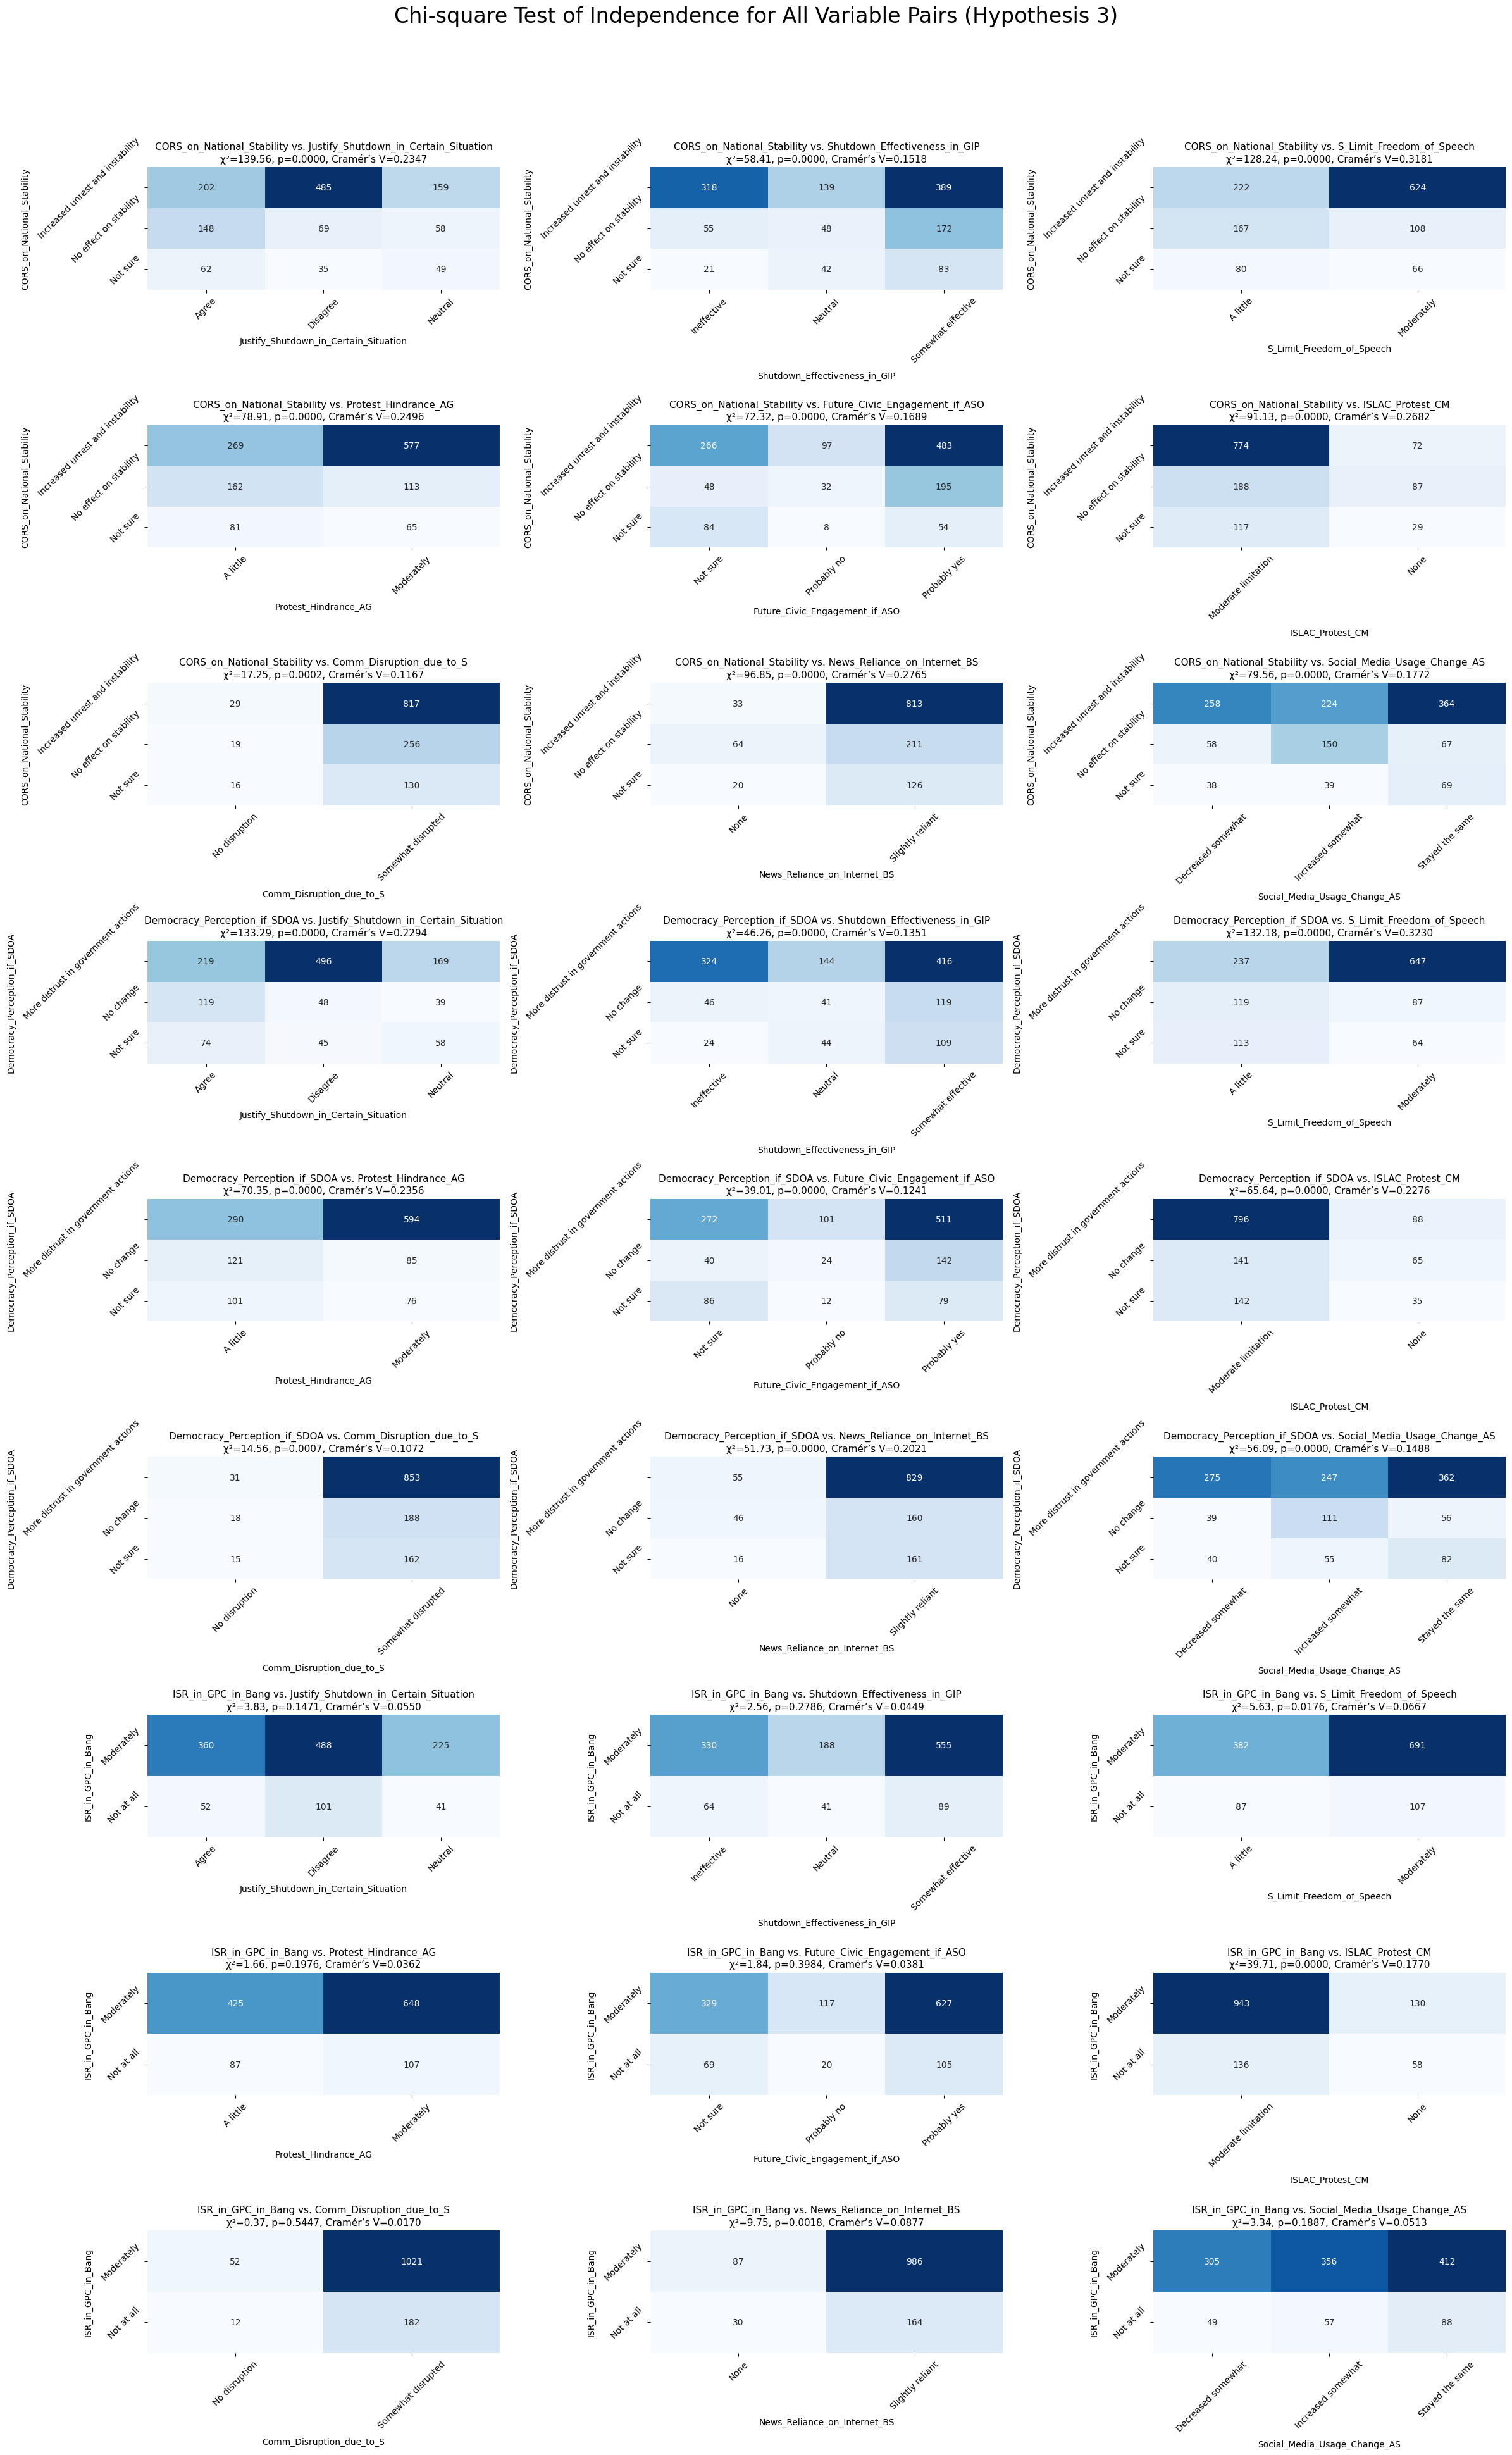

In [99]:
# Define all tested variable pairs
all_pairs = [(dep, indep) for dep in dependent_vars for indep in independent_vars]

# Setup subplot grid dimensions
rows = 9
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(24, 38))  # Bigger figure size for 27 plots

# Flatten axes array for easy indexing
axes = axes.flatten()

# Function to plot individual heatmaps clearly
for i, (dep_var, indep_var) in enumerate(all_pairs):
    contingency_table = pd.crosstab(df_hy3[dep_var], df_hy3[indep_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = (chi2 / (n * min_dim)) ** 0.5

    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'{dep_var} vs. {indep_var}\nχ²={chi2:.2f}, p={p:.4f}, Cramér’s V={cramers_v:.4f}',
                      fontsize=11)

    # Main Axis Labels
    axes[i].set_xlabel(indep_var, fontsize=10, labelpad=8)
    axes[i].set_ylabel(dep_var, fontsize=10, labelpad=8)

    # Rotate Tick Labels
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].tick_params(axis='y', labelrotation=45)

# Hide any unused subplots
for j in range(len(all_pairs), rows * cols):
    fig.delaxes(axes[j])

# Overall Title
fig.suptitle('Chi-square Test of Independence for All Variable Pairs (Hypothesis 3)', fontsize=24, y=1.02)

# Adjust Layout
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Save figure to file if needed
# plt.savefig('Chi_square_Hypothesis3_All_Pairs.png', dpi=300)

plt.show()


###### 5.1.4.3: Cramér's V Correlation Matrix (visualizes strength of association clearly)

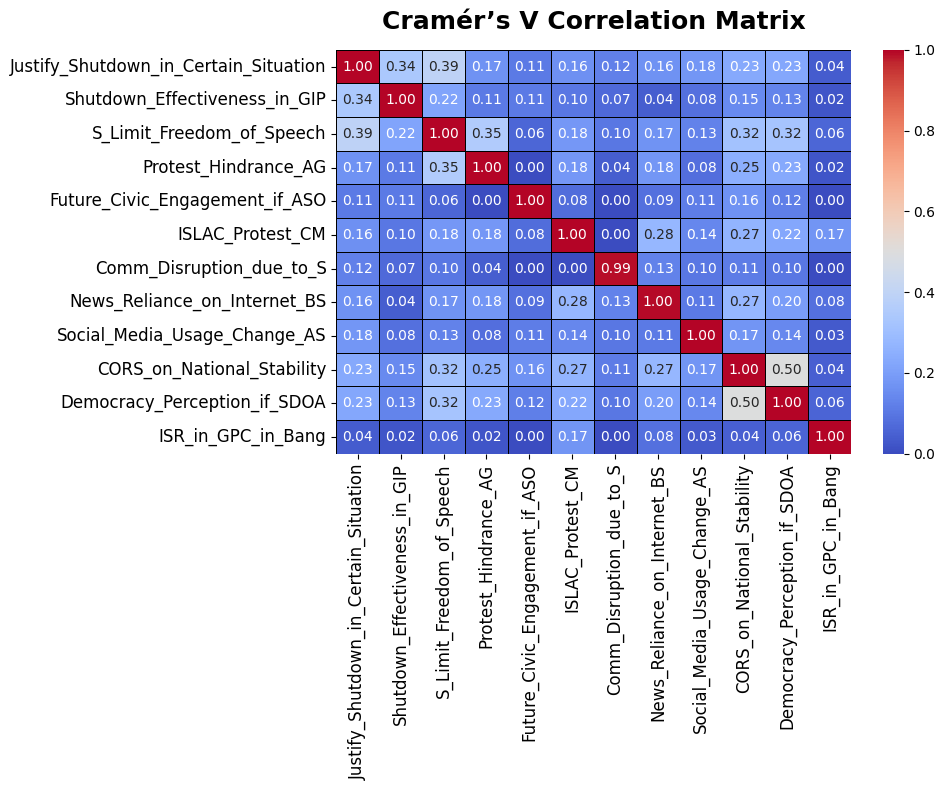

In [100]:
# Define variables for the correlation matrix (dependent + independent)

variables = [
    'Justify_Shutdown_in_Certain_Situation',
    'Shutdown_Effectiveness_in_GIP', 
    'S_Limit_Freedom_of_Speech', 
    'Protest_Hindrance_AG',
    'Future_Civic_Engagement_if_ASO', 
    'ISLAC_Protest_CM', 
    'Comm_Disruption_due_to_S', 
    'News_Reliance_on_Internet_BS',
    'Social_Media_Usage_Change_AS',
    'CORS_on_National_Stability',
    'Democracy_Perception_if_SDOA',
    'ISR_in_GPC_in_Bang'
]


# Function to compute Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute correlation matrix
cramers_v_matrix = pd.DataFrame(np.zeros((len(variables), len(variables))),
                                index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        cramers_v_matrix.loc[var1, var2] = round(cramers_v(df_hy3[var1], df_hy3[var2]), 4)

# Plot the heatmap clearly
plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

# Add clear titles and labels
plt.title("Cramér’s V Correlation Matrix", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the figure clearly
# plt.savefig('Cramers_V_Correlation_Matrix.png', dpi=300, bbox_inches='tight')

plt.show()

###### 5.1.5: Validate Statistical Robustness (Bonferroni Correction)

In [101]:
# Bonferroni correction for Chi-square results
chi_square_results_df_corrected['Bonferroni_Significance'] = chi_square_results_df_corrected['P-value'].apply(
    lambda p: 'Significant ✅' if p < (0.05 / len(chi_square_results_df_corrected)) else 'Not Significant ❌'
)

# Display updated results clearly
print("\nChi-square Test Summary Table (with Bonferroni Correction):")
print(chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance', 'Bonferroni_Significance']])



Chi-square Test Summary Table (with Bonferroni Correction):
              Dependent Variable                   Independent Variable  P-value       Significance Bonferroni_Significance
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation   0.0000      Significant ✅           Significant ✅
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP   0.0000      Significant ✅           Significant ✅
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech   0.0000      Significant ✅           Significant ✅
3     CORS_on_National_Stability                   Protest_Hindrance_AG   0.0000      Significant ✅           Significant ✅
4     CORS_on_National_Stability         Future_Civic_Engagement_if_ASO   0.0000      Significant ✅           Significant ✅
5     CORS_on_National_Stability                       ISLAC_Protest_CM   0.0000      Significant ✅           Significant ✅
6     CORS_on_National_Stability               Comm_Disruption_due_to_S

###### 5.1.6: Effect Size Interpretation (Cramér’s V)

In [102]:
# Define effect size interpretation thresholds for Cramér’s V
def interpret_cramers_v(value):
    if value < 0.1:
        return "Negligible 🔹"
    elif value < 0.2:
        return "Weak ⚠️"
    elif value < 0.4:
        return "Moderate ✅"
    else:
        return "Strong 🔥"

# Apply interpretation to Cramér’s V values
chi_square_results_df_corrected['Effect Size Interpretation'] = chi_square_results_df_corrected[
    'Effect Size (Bias-Corrected Cramér’s V)'].apply(interpret_cramers_v)

# Display updated results with effect size interpretations
print("Effect Size Interpretation (Cramér’s V)")
print(chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'Effect Size (Bias-Corrected Cramér’s V)', 'Effect Size Interpretation']])

Effect Size Interpretation (Cramér’s V)
              Dependent Variable                   Independent Variable  Effect Size (Bias-Corrected Cramér’s V) Effect Size Interpretation
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation                                   0.2315                 Moderate ✅
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP                                   0.1466                    Weak ⚠️
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech                                   0.3158                 Moderate ✅
3     CORS_on_National_Stability                   Protest_Hindrance_AG                                   0.2465                 Moderate ✅
4     CORS_on_National_Stability         Future_Civic_Engagement_if_ASO                                   0.1643                    Weak ⚠️
5     CORS_on_National_Stability                       ISLAC_Protest_CM                                   0.2653        

5.2: Ordinal Logistic Regression Models

###### 5.2.1: Fit Ordinal Logistic Regression Model

In [103]:
# Create a new DataFrame containing both independent and dependent variables related to Hypothesis 1
df_hy3_selected = df_hy3[[
    'Justify_Shutdown_in_Certain_Situation',
    'Shutdown_Effectiveness_in_GIP', 
    'S_Limit_Freedom_of_Speech', 
    'Protest_Hindrance_AG',
    'Future_Civic_Engagement_if_ASO', 
    'ISLAC_Protest_CM', 
    'Comm_Disruption_due_to_S', 
    'News_Reliance_on_Internet_BS',
    'Social_Media_Usage_Change_AS',
    'CORS_on_National_Stability',
    'Democracy_Perception_if_SDOA',
    'ISR_in_GPC_in_Bang'
]]

In [104]:
# Display distinct values for each feature in df_hy1_selected
distinct_values = {col: df_hy3_selected[col].unique().tolist() for col in df_hy3_selected.columns}

# Print the distinct values for each column
for col, values in distinct_values.items():
    print(f"{col}: {values}")

Justify_Shutdown_in_Certain_Situation: ['Neutral', 'Agree', 'Disagree']
Shutdown_Effectiveness_in_GIP: ['Neutral', 'Somewhat effective', 'Ineffective']
S_Limit_Freedom_of_Speech: ['A little', 'Moderately']
Protest_Hindrance_AG: ['A little', 'Moderately']
Future_Civic_Engagement_if_ASO: ['Not sure', 'Probably yes', 'Probably no']
ISLAC_Protest_CM: ['Moderate limitation', 'None']
Comm_Disruption_due_to_S: ['No disruption', 'Somewhat disrupted']
News_Reliance_on_Internet_BS: ['None', 'Slightly reliant']
Social_Media_Usage_Change_AS: ['Stayed the same', 'Decreased somewhat', 'Increased somewhat']
CORS_on_National_Stability: ['Not sure', 'Increased unrest and instability', 'No effect on stability']
Democracy_Perception_if_SDOA: ['Not sure', 'More distrust in government actions', 'No change']
ISR_in_GPC_in_Bang: ['Not at all', 'Moderately']


In [105]:
ordinal_mappings = {
    "Justify_Shutdown_in_Certain_Situation": {"Neutral": 0, "Agree": 1, "Disagree": 2},
    "Shutdown_Effectiveness_in_GIP": {"Neutral": 0, "Somewhat effective": 1, "Ineffective": 2},
    "S_Limit_Freedom_of_Speech": {"A little": 0, "Moderately": 1},
    "Protest_Hindrance_AG": {"A little": 0,"Moderately": 1},
    "Future_Civic_Engagement_if_ASO": {"Not sure": 0,"Probably yes": 1,"Probably no": 2},
    "ISLAC_Protest_CM": {"None": 0, "Moderate limitation": 1},
    "Comm_Disruption_due_to_S": {"No disruption": 0, "Somewhat disrupted": 1},
    "News_Reliance_on_Internet_BS": {"None": 0, "Slightly reliant": 1},
    "Social_Media_Usage_Change_AS": {"Stayed the same": 0, "Decreased somewhat": 1, "Increased somewhat": 2},
    "CORS_on_National_Stability": {"Not sure": 0, "No effect on stability": 1, "Increased unrest and instability": 2},
    "Democracy_Perception_if_SDOA": {"Not sure": 0, "No change": 1, "More distrust in government actions": 2},
    "ISR_in_GPC_in_Bang": {"Not at all": 0, "Moderately": 1}
}

In [106]:
# Create a copy of the dataset
df_hy3_encoded = df_hy3_selected.copy()

# Apply the encoding
for col, mapping in ordinal_mappings.items():
    df_hy3_encoded[col] = df_hy3_encoded[col].map(mapping)

In [107]:
# Check for missing values after encoding
missing_values = df_hy3_encoded.isnull().sum()

print("\nMissing Values:\n", missing_values) # Show the mapping and missing values


Missing Values:
 Justify_Shutdown_in_Certain_Situation    0
Shutdown_Effectiveness_in_GIP            0
S_Limit_Freedom_of_Speech                0
Protest_Hindrance_AG                     0
Future_Civic_Engagement_if_ASO           0
ISLAC_Protest_CM                         0
Comm_Disruption_due_to_S                 0
News_Reliance_on_Internet_BS             0
Social_Media_Usage_Change_AS             0
CORS_on_National_Stability               0
Democracy_Perception_if_SDOA             0
ISR_in_GPC_in_Bang                       0
dtype: int64


In [108]:
# Display the processed dataset and the mapping
print("Preprocessed Dataset:\n", df_hy3_encoded.head())

Preprocessed Dataset:
    Justify_Shutdown_in_Certain_Situation  Shutdown_Effectiveness_in_GIP  S_Limit_Freedom_of_Speech  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  ISLAC_Protest_CM  Comm_Disruption_due_to_S  News_Reliance_on_Internet_BS  Social_Media_Usage_Change_AS  CORS_on_National_Stability  Democracy_Perception_if_SDOA  ISR_in_GPC_in_Bang
0                                      0                              0                          0                     0                               0                 1                         0                             0                             0                           0                             0                   0
1                                      1                              1                          0                     1                               1                 0                         1                             1                             1                           2                       

In [109]:
print("\nOrdinal Mappings:\n", ordinal_mappings)


Ordinal Mappings:
 {'Justify_Shutdown_in_Certain_Situation': {'Neutral': 0, 'Agree': 1, 'Disagree': 2}, 'Shutdown_Effectiveness_in_GIP': {'Neutral': 0, 'Somewhat effective': 1, 'Ineffective': 2}, 'S_Limit_Freedom_of_Speech': {'A little': 0, 'Moderately': 1}, 'Protest_Hindrance_AG': {'A little': 0, 'Moderately': 1}, 'Future_Civic_Engagement_if_ASO': {'Not sure': 0, 'Probably yes': 1, 'Probably no': 2}, 'ISLAC_Protest_CM': {'None': 0, 'Moderate limitation': 1}, 'Comm_Disruption_due_to_S': {'No disruption': 0, 'Somewhat disrupted': 1}, 'News_Reliance_on_Internet_BS': {'None': 0, 'Slightly reliant': 1}, 'Social_Media_Usage_Change_AS': {'Stayed the same': 0, 'Decreased somewhat': 1, 'Increased somewhat': 2}, 'CORS_on_National_Stability': {'Not sure': 0, 'No effect on stability': 1, 'Increased unrest and instability': 2}, 'Democracy_Perception_if_SDOA': {'Not sure': 0, 'No change': 1, 'More distrust in government actions': 2}, 'ISR_in_GPC_in_Bang': {'Not at all': 0, 'Moderately': 1}}


###### 5.2.2: Interpret Results & Identify Significant Predictors

In [110]:
# Define independent and dependent variables
IVs = [
    'Justify_Shutdown_in_Certain_Situation',
    'Shutdown_Effectiveness_in_GIP',
    'S_Limit_Freedom_of_Speech',
    'Protest_Hindrance_AG',
    'Future_Civic_Engagement_if_ASO',
    'ISLAC_Protest_CM',
    'Comm_Disruption_due_to_S',
    'News_Reliance_on_Internet_BS',
    'Social_Media_Usage_Change_AS'   
]

DVs= [
    'CORS_on_National_Stability',
    'Democracy_Perception_if_SDOA',
    'ISR_in_GPC_in_Bang'
]


# Initialize dictionary to store significant predictors
significant_predictors = {}

# Loop through each DV and fit a separate ordinal logistic regression model
i = 1
for DV in DVs:
    print(f"\n=== {i}. Ordinal Logistic Regression for {DV} ===")
    
    # Convert dependent variable to categorical ordinal
    df_hy3_encoded[DV] = df_hy3_encoded[DV].astype("category")

    # Build the model
    model = OrderedModel(df_hy3_encoded[DV], df_hy3_encoded[IVs], distr="logit")
    
    # Fit the model
    result = model.fit()
    
    # Print the summary
    print(result.summary())

    # Extract significant predictors (p-value < 0.05)
    significant_vars = result.pvalues[result.pvalues < 0.05].index.tolist()
    significant_predictors[DV] = significant_vars
    
    i += 1

# Display significant predictors
print("\n=== Significant Predictors per Dependent Variable ===")
for dv, predictors in significant_predictors.items():
    print(f"   - {dv}: {predictors if predictors else 'No significant predictors'}")



=== 1. Ordinal Logistic Regression for CORS_on_National_Stability ===
                                 OrderedModel Results                                 
Dep. Variable:     CORS_on_National_Stability   Log-Likelihood:                -1021.9
Model:                           OrderedModel   AIC:                             2066.
Method:                    Maximum Likelihood   BIC:                             2122.
Date:                        Fri, 04 Jul 2025                                         
Time:                                23:49:30                                         
No. Observations:                        1267                                         
Df Residuals:                            1256                                         
Df Model:                                   9                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

###### 5.2.3: Calculate McFadden’s Pseudo R² (Measure Model Fit)

In [111]:
# Ensure pseudo_r2_values list exists
pseudo_r2_results = []

for DV in DVs:
    print(f"\n🔹 Calculating McFadden’s Pseudo R² for {DV}")

    try:
        # Build the model
        model = OrderedModel(df_hy3_encoded[DV], df_hy3_encoded[IVs], distr="logit")
        result = model.fit(disp=False)

        # Extract log-likelihood values
        null_log_likelihood = result.llnull  # Null model log-likelihood
        model_log_likelihood = result.llf    # Fitted model log-likelihood

        # Compute McFadden’s Pseudo R²
        pseudo_r2 = 1 - (model_log_likelihood / null_log_likelihood)

        # Store results
        pseudo_r2_results.append({
            "Dependent Variable": DV,
            "McFadden’s Pseudo R²": round(pseudo_r2, 4),
            "Interpretation": "Weak Model Fit ⚠️" if pseudo_r2 < 0.2 else 
                              "Moderate Model Fit ✅" if pseudo_r2 < 0.4 else 
                              "Strong Model Fit 🔥"
        })
    
    except Exception as e:
        print(f"⚠️ Error calculating Pseudo R² for {DV}: {e}")
        pseudo_r2_results.append({
            "Dependent Variable": DV,
            "McFadden’s Pseudo R²": "Error",
            "Interpretation": "N/A"
        })

# Convert results into a DataFrame
pseudo_r2_df = pd.DataFrame(pseudo_r2_results)

# Display McFadden’s Pseudo R² values
print(pseudo_r2_df)



🔹 Calculating McFadden’s Pseudo R² for CORS_on_National_Stability



🔹 Calculating McFadden’s Pseudo R² for Democracy_Perception_if_SDOA

🔹 Calculating McFadden’s Pseudo R² for ISR_in_GPC_in_Bang
             Dependent Variable  McFadden’s Pseudo R²     Interpretation
0    CORS_on_National_Stability                0.0514  Weak Model Fit ⚠️
1  Democracy_Perception_if_SDOA                0.0413  Weak Model Fit ⚠️
2            ISR_in_GPC_in_Bang                0.0272  Weak Model Fit ⚠️


###### 5.2.4: Effect Size Interpretation

In [112]:
effect_sizes = {}

for DV in DVs:
    model = OrderedModel(df_hy3_encoded[DV], df_hy3_encoded[IVs], distr="logit")
    result = model.fit()
    coefs = result.params
    effect_sizes[DV] = coefs

    print(f"\nEffect Size Interpretation for {DV}:\n")
    for var, coef in coefs.items():
        direction = "Positive 📈" if coef > 0 else "Negative 📉"
        strength = "Strong 🔥" if abs(coef) > 1 else "Moderate ✅" if abs(coef) > 0.5 else "Weak ⚠️"
        print(f"{var}: {coef:.4f} ({direction}, {strength})")

# Final Output
print("\nOrdinal Logistic Regression Analysis Completed Successfully 🚀")


Effect Size Interpretation for CORS_on_National_Stability:

Justify_Shutdown_in_Certain_Situation: 0.3762 (Positive 📈, Weak ⚠️)
Shutdown_Effectiveness_in_GIP: 0.1334 (Positive 📈, Weak ⚠️)
S_Limit_Freedom_of_Speech: 0.2591 (Positive 📈, Weak ⚠️)
Protest_Hindrance_AG: -0.0458 (Negative 📉, Weak ⚠️)
Future_Civic_Engagement_if_ASO: 0.2074 (Positive 📈, Weak ⚠️)
ISLAC_Protest_CM: 0.0692 (Positive 📈, Weak ⚠️)
Comm_Disruption_due_to_S: -0.1211 (Negative 📉, Weak ⚠️)
News_Reliance_on_Internet_BS: 0.0074 (Positive 📈, Weak ⚠️)
Social_Media_Usage_Change_AS: -0.5435 (Negative 📉, Moderate ✅)
0/1: -1.8648 (Negative 📉, Strong 🔥)
1/2: 0.3665 (Positive 📈, Weak ⚠️)

Effect Size Interpretation for Democracy_Perception_if_SDOA:

Justify_Shutdown_in_Certain_Situation: 0.3411 (Positive 📈, Weak ⚠️)
Shutdown_Effectiveness_in_GIP: 0.0580 (Positive 📈, Weak ⚠️)
S_Limit_Freedom_of_Speech: 0.2801 (Positive 📈, Weak ⚠️)
Protest_Hindrance_AG: 0.1645 (Positive 📈, Weak ⚠️)
Future_Civic_Engagement_if_ASO: 0.3174 (Positive 

5.3: Kruskal-Wallis Test for IV-DV Relationships

###### 5.3.1: Run Kruskal-Wallis Test for Each IV-DV Pair

In [113]:
# Define independent and dependent variables
IVs = [
    'Justify_Shutdown_in_Certain_Situation',
    'Shutdown_Effectiveness_in_GIP',
    'S_Limit_Freedom_of_Speech',
    'Protest_Hindrance_AG',
    'Future_Civic_Engagement_if_ASO',
    'ISLAC_Protest_CM',
    'Comm_Disruption_due_to_S',
    'News_Reliance_on_Internet_BS',
    'Social_Media_Usage_Change_AS'   
]

DVs= [
    'CORS_on_National_Stability',
    'Democracy_Perception_if_SDOA',
    'ISR_in_GPC_in_Bang'
]

# Initialize dictionary to store p-values
kruskal_results = []

for DV in DVs:
    for IV in IVs:
        groups = [df_hy3_encoded[DV][df_hy3_encoded[IV] == category] for category in df_hy3_encoded[IV].unique()]
        stat, p_value = kruskal(*groups)

        kruskal_results.append({
            "Dependent Variable": DV,
            "Independent Variable": IV,
            "Test Statistic": round(stat, 4),
            "P-value": round(p_value, 4),
            "Significance": "Significant ✅" if p_value < 0.05 else "Not Significant ❌"
        })

# Display results
kruskal_results_df = pd.DataFrame(kruskal_results)
print(kruskal_results_df)

              Dependent Variable                   Independent Variable  Test Statistic  P-value       Significance
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation        121.6793   0.0000      Significant ✅
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP         51.5803   0.0000      Significant ✅
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech        117.1382   0.0000      Significant ✅
3     CORS_on_National_Stability                   Protest_Hindrance_AG         73.3193   0.0000      Significant ✅
4     CORS_on_National_Stability         Future_Civic_Engagement_if_ASO          3.6083   0.1646  Not Significant ❌
5     CORS_on_National_Stability                       ISLAC_Protest_CM         67.2433   0.0000      Significant ✅
6     CORS_on_National_Stability               Comm_Disruption_due_to_S         16.1104   0.0001      Significant ✅
7     CORS_on_National_Stability           News_Reliance_on_Internet_BS 

###### 5.3.2: Interpret Results (Which IVs Significantly Affect DVs?)

In [114]:
for index, row in kruskal_results_df.iterrows():
    print(f"\nKruskal-Wallis Test for {row['Independent Variable']} vs {row['Dependent Variable']}:")
    print(f"Test Statistic: {row['Test Statistic']}, P-value: {row['P-value']}")

    # Decision
    if row["P-value"] < 0.05:
        print(f"Reject H₀: {row['Independent Variable']} significantly affects {row['Dependent Variable']} ✅")
    else:
        print(f"Fail to reject H₀: No significant difference in {row['Dependent Variable']} based on {row['Independent Variable']} ❌")


Kruskal-Wallis Test for Justify_Shutdown_in_Certain_Situation vs CORS_on_National_Stability:
Test Statistic: 121.6793, P-value: 0.0
Reject H₀: Justify_Shutdown_in_Certain_Situation significantly affects CORS_on_National_Stability ✅

Kruskal-Wallis Test for Shutdown_Effectiveness_in_GIP vs CORS_on_National_Stability:
Test Statistic: 51.5803, P-value: 0.0
Reject H₀: Shutdown_Effectiveness_in_GIP significantly affects CORS_on_National_Stability ✅

Kruskal-Wallis Test for S_Limit_Freedom_of_Speech vs CORS_on_National_Stability:
Test Statistic: 117.1382, P-value: 0.0
Reject H₀: S_Limit_Freedom_of_Speech significantly affects CORS_on_National_Stability ✅

Kruskal-Wallis Test for Protest_Hindrance_AG vs CORS_on_National_Stability:
Test Statistic: 73.3193, P-value: 0.0
Reject H₀: Protest_Hindrance_AG significantly affects CORS_on_National_Stability ✅

Kruskal-Wallis Test for Future_Civic_Engagement_if_ASO vs CORS_on_National_Stability:
Test Statistic: 3.6083, P-value: 0.1646
Fail to reject H₀

###### 5.3.3: Compute Effect Size (Eta-Squared or Epsilon-Squared)

In [115]:
effect_size_results = []

for DV in DVs:
    for IV in IVs:
        groups = [df_hy3_encoded[DV][df_hy3_encoded[IV] == category] for category in df_hy3_encoded[IV].unique()]
        stat, p_value = kruskal(*groups)

        # Compute Eta-Squared (η²) = (H - k + 1) / (n - k)
        k = len(groups)  # Number of groups
        n = len(df_hy3_encoded[DV])  # Total sample size
        eta_squared = (stat - (k - 1)) / (n - k)

        # Compute Epsilon-Squared (ε²) = H / (N - 1)
        epsilon_squared = stat / (n - 1)

        effect_size_results.append({
            "Dependent Variable": DV,
            "Independent Variable": IV,
            "Eta-Squared (η²)": round(eta_squared, 4),
            "Epsilon-Squared (ε²)": round(epsilon_squared, 4),
            "Effect Size Interpretation": 
                "Small 🔹" if eta_squared < 0.01 else
                "Medium ✅" if eta_squared < 0.06 else
                "Large 🔥"
        })

# Display effect size results
effect_size_results_df = pd.DataFrame(effect_size_results)
print("Effect Size (Eta-Squared & Epsilon-Squared)")
print(effect_size_results_df)

Effect Size (Eta-Squared & Epsilon-Squared)
              Dependent Variable                   Independent Variable  Eta-Squared (η²)  Epsilon-Squared (ε²) Effect Size Interpretation
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation            0.0947                0.0961                    Large 🔥
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP            0.0392                0.0407                   Medium ✅
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech            0.0918                0.0925                    Large 🔥
3     CORS_on_National_Stability                   Protest_Hindrance_AG            0.0572                0.0579                   Medium ✅
4     CORS_on_National_Stability         Future_Civic_Engagement_if_ASO            0.0013                0.0029                    Small 🔹
5     CORS_on_National_Stability                       ISLAC_Protest_CM            0.0524                0.0531           

###### 5.3.4: Boxplot & Violin Plot for Kruskal-Wallis Results

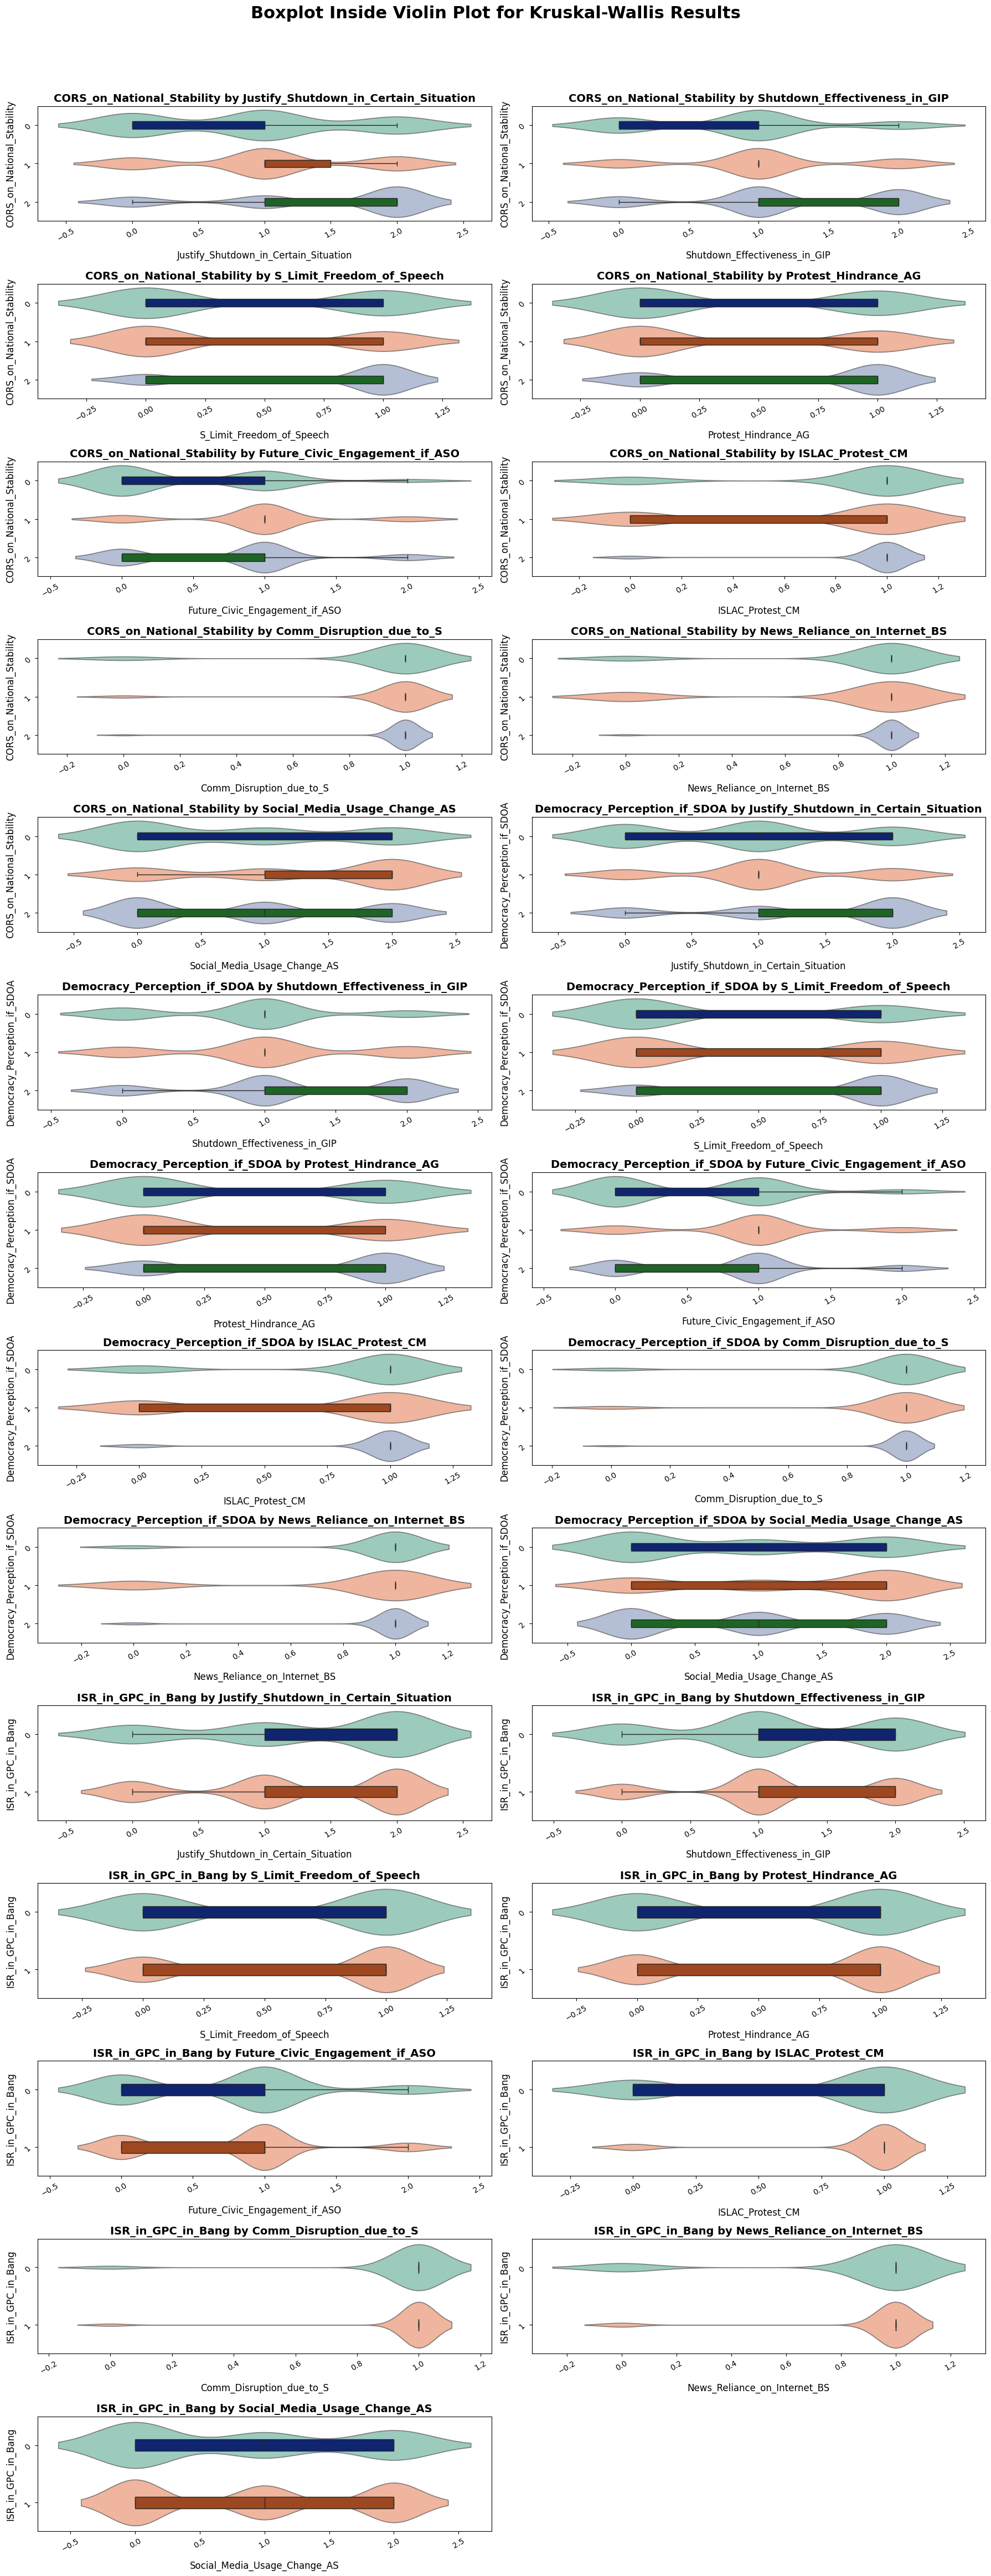

In [116]:
# Set up the figure for multiple plots (15 rows, 2 columns)
fig, axes = plt.subplots(15, 2, figsize=(18, 50))  # Bigger because 30 plots
fig.suptitle("Boxplot Inside Violin Plot for Kruskal-Wallis Results", fontsize=22, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define all IV-DV pairs for plotting
variable_pairs = [(DV, IV) for DV in DVs for IV in IVs]

# Plot each IV-DV pair
for idx, (DV, IV) in enumerate(variable_pairs[:30]):  # Limit to first 30 pairs if needed
    ax = axes[idx]

    # Create violin plot (distribution shape)
    sns.violinplot(x=df_hy3_encoded[IV], y=df_hy3_encoded[DV], inner=None, ax=ax, palette="Set2", alpha=0.7)

    # Add box plot inside the violin plot
    sns.boxplot(x=df_hy3_encoded[IV], y=df_hy3_encoded[DV], ax=ax, width=0.2, palette="dark", showfliers=False)

    ax.set_title(f"{DV} by {IV}", fontsize=14, fontweight="bold")

    # Main axis labels
    ax.set_xlabel(IV, fontsize=12, labelpad=10)
    ax.set_ylabel(DV, fontsize=12, labelpad=10)

    # Rotate tick labels
    ax.tick_params(axis='x', rotation=30)
    ax.tick_params(axis='y', rotation=45)  # <--- Rotating y-axis ticks now!

# Hide any unused subplots
for idx in range(len(variable_pairs), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


5.4: Final Interpretation & Hypothesis Conclusion

###### 5.4.1: Summarize Statistical Findings

In [117]:
# 1️⃣ **Chi-Square Test Findings (Association between IVs & DVs)**
print("\n📌 **Chi-Square Test Results:** (Testing Association Between Variables)")
chi_summary = chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance', 'Effect Size Interpretation']]
print(chi_summary)


📌 **Chi-Square Test Results:** (Testing Association Between Variables)
              Dependent Variable                   Independent Variable  P-value       Significance Effect Size Interpretation
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation   0.0000      Significant ✅                 Moderate ✅
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP   0.0000      Significant ✅                    Weak ⚠️
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech   0.0000      Significant ✅                 Moderate ✅
3     CORS_on_National_Stability                   Protest_Hindrance_AG   0.0000      Significant ✅                 Moderate ✅
4     CORS_on_National_Stability         Future_Civic_Engagement_if_ASO   0.0000      Significant ✅                    Weak ⚠️
5     CORS_on_National_Stability                       ISLAC_Protest_CM   0.0000      Significant ✅                 Moderate ✅
6     CORS_on_National_Stability       

In [118]:
# 2️⃣ **Ordinal Logistic Regression Results (Predictive Strength & Significant Variables)**
print("\n📌 **Ordinal Logistic Regression Results:** (Predicting Impact of IVs on DVs)")
print("\n🔹 **Significant Predictors per Dependent Variable:**")
if significant_predictors:
    for dv, predictors in significant_predictors.items():
        print(f"   - {dv}: {predictors if predictors else 'No significant predictors'}")
else:
    print("   No significant predictors found.")


📌 **Ordinal Logistic Regression Results:** (Predicting Impact of IVs on DVs)

🔹 **Significant Predictors per Dependent Variable:**
   - CORS_on_National_Stability: ['Justify_Shutdown_in_Certain_Situation', 'Future_Civic_Engagement_if_ASO', 'Social_Media_Usage_Change_AS', '0/1', '1/2']
   - Democracy_Perception_if_SDOA: ['Justify_Shutdown_in_Certain_Situation', 'S_Limit_Freedom_of_Speech', 'Future_Civic_Engagement_if_ASO', 'Social_Media_Usage_Change_AS', '0/1']
   - ISR_in_GPC_in_Bang: ['Justify_Shutdown_in_Certain_Situation', 'ISLAC_Protest_CM', '0/1']


In [119]:
# 3️⃣ **Kruskal-Wallis Test Findings (Group-wise Differences)**
print("\n📌 **Kruskal-Wallis Test Results:** (Testing Whether Different Groups Show Statistical Differences)")
kruskal_summary = kruskal_results_df[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance']]
print(kruskal_summary)


📌 **Kruskal-Wallis Test Results:** (Testing Whether Different Groups Show Statistical Differences)
              Dependent Variable                   Independent Variable  P-value       Significance
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation   0.0000      Significant ✅
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP   0.0000      Significant ✅
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech   0.0000      Significant ✅
3     CORS_on_National_Stability                   Protest_Hindrance_AG   0.0000      Significant ✅
4     CORS_on_National_Stability         Future_Civic_Engagement_if_ASO   0.1646  Not Significant ❌
5     CORS_on_National_Stability                       ISLAC_Protest_CM   0.0000      Significant ✅
6     CORS_on_National_Stability               Comm_Disruption_due_to_S   0.0001      Significant ✅
7     CORS_on_National_Stability           News_Reliance_on_Internet_BS   0.0000      Significant ✅


In [120]:
# 4️⃣ **Effect Size Analysis (Chi-Square & Kruskal-Wallis)**
print("\n📌 **Effect Size Results (Chi-Square & Kruskal-Wallis):**")
effect_size_summary = effect_size_results_df[['Dependent Variable', 'Independent Variable', 'Eta-Squared (η²)', 'Epsilon-Squared (ε²)', 'Effect Size Interpretation']]
print(effect_size_summary)


📌 **Effect Size Results (Chi-Square & Kruskal-Wallis):**
              Dependent Variable                   Independent Variable  Eta-Squared (η²)  Epsilon-Squared (ε²) Effect Size Interpretation
0     CORS_on_National_Stability  Justify_Shutdown_in_Certain_Situation            0.0947                0.0961                    Large 🔥
1     CORS_on_National_Stability          Shutdown_Effectiveness_in_GIP            0.0392                0.0407                   Medium ✅
2     CORS_on_National_Stability              S_Limit_Freedom_of_Speech            0.0918                0.0925                    Large 🔥
3     CORS_on_National_Stability                   Protest_Hindrance_AG            0.0572                0.0579                   Medium ✅
4     CORS_on_National_Stability         Future_Civic_Engagement_if_ASO            0.0013                0.0029                    Small 🔹
5     CORS_on_National_Stability                       ISLAC_Protest_CM            0.0524                0.0

In [121]:
# 5️⃣ **McFadden’s Pseudo R² (Ordinal Logistic Regression)**
print("\n📌 **Model Fit: McFadden’s Pseudo R² for Ordinal Logistic Regression:**")

# Ensure pseudo_r2_df exists before trying to access it
if 'pseudo_r2_df' in globals() and not pseudo_r2_df.empty:
    for index, row in pseudo_r2_df.iterrows():
        print(f"   - {row['Dependent Variable']}: McFadden’s R² = {row['McFadden’s Pseudo R²']} "
              f"({row['Interpretation']})")
else:
    print("   McFadden’s Pseudo R² values are missing. Re-run Step 3.2.3 if needed.")



📌 **Model Fit: McFadden’s Pseudo R² for Ordinal Logistic Regression:**
   - CORS_on_National_Stability: McFadden’s R² = 0.0514 (Weak Model Fit ⚠️)
   - Democracy_Perception_if_SDOA: McFadden’s R² = 0.0413 (Weak Model Fit ⚠️)
   - ISR_in_GPC_in_Bang: McFadden’s R² = 0.0272 (Weak Model Fit ⚠️)


###### 5.4.2: State if Hypothesis 2 is Accepted or Rejected

In [122]:
  

# Define hypothesis statements
null_hypothesis = "Internet shutdowns have no significant impact on public perception of government stability or trust in governance."
alternative_hypothesis = "Internet shutdowns impact public perception of government stability or trust in governance."

# Collect significant results from all tests

# 1️⃣ Chi-Square Test Results
significant_chi = set(chi_square_results_df_corrected[chi_square_results_df_corrected['Significance'] == 'Significant ✅']['Dependent Variable'])

# 2️⃣ Kruskal-Wallis Test Results
significant_kruskal = set(kruskal_results_df[kruskal_results_df['Significance'] == 'Significant ✅']['Dependent Variable'])

# 3️⃣ Ordinal Logistic Regression (Significant Predictors)
significant_ordinal = set([dv for dv, predictors in significant_predictors.items() if predictors])

# 4️⃣ Effect Size Interpretation (Cramér’s V, Eta-Squared, Epsilon-Squared)
strong_effect_size = set(effect_size_results_df[effect_size_results_df['Effect Size Interpretation'].isin(['Moderate ✅', 'Large 🔥'])]['Dependent Variable'])

# 5️⃣ McFadden’s Pseudo R² (Check for good model fit)
strong_model_fit = set(pseudo_r2_df[pseudo_r2_df['Interpretation'].isin(['Moderate Model Fit ✅', 'Strong Model Fit 🔥'])]['Dependent Variable'])

# Combine all significant findings
significant_iv_dv_pairs = significant_chi | significant_kruskal | significant_ordinal | strong_effect_size | strong_model_fit

# Final Decision
if len(significant_iv_dv_pairs) > 0:
    print(f"\n✅ **We reject the null hypothesis (H₀):** {null_hypothesis}")
    print(f"✅ **We accept the alternative hypothesis (H₁):** {alternative_hypothesis}")
    print("🔹 The combined statistical evidence supports that shutdowns have a **significant impact** on protests, civic engagement, and communication.")
    print("\n📌 **Significant Dependent Variables:**")
    print(f"   - {', '.join(significant_iv_dv_pairs)}")
else:
    print(f"\n❌ **We fail to reject the null hypothesis (H₀):** {null_hypothesis}")
    print("🔹 The statistical tests do not provide strong enough evidence to conclude that shutdowns significantly impact protests, civic engagement, and communication.")



✅ **We reject the null hypothesis (H₀):** Internet shutdowns have no significant impact on public perception of government stability or trust in governance.
✅ **We accept the alternative hypothesis (H₁):** Internet shutdowns impact public perception of government stability or trust in governance.
🔹 The combined statistical evidence supports that shutdowns have a **significant impact** on protests, civic engagement, and communication.

📌 **Significant Dependent Variables:**
   - Democracy_Perception_if_SDOA, ISR_in_GPC_in_Bang, CORS_on_National_Stability


###### 5.4.3: Explain the Real-World Implications of Shutdowns on Protests & Civic Movements

<h1 align="center">ML</h1>

Step 5.5.1: Core Libraries

In [123]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# General display settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")


Step 5.5.2: Load Dataset

In [124]:
# Load the cleaned dataset
file_path = "df_cleaned.xlsx"
df = pd.read_excel(file_path)

# Preview dataset
print("✅ Dataset loaded successfully!")
print("🔹 Shape:", df.shape)
#df.head()


✅ Dataset loaded successfully!
🔹 Shape: (1267, 28)


Step 5.5.3: Feature Selection

In [125]:
# Select Independent Variables (features)
independent_vars = [
    'Justify_Shutdown_in_Certain_Situation', 
    'Shutdown_Effectiveness_in_GIP', 
    'S_Limit_Freedom_of_Speech',
    'Protest_Hindrance_AG', 
    'Future_Civic_Engagement_if_ASO', 
    'ISLAC_Protest_CM',
    'Comm_Disruption_due_to_S', 
    'News_Reliance_on_Internet_BS', 
    'Social_Media_Usage_Change_AS'
]

# Select Dependent Variables (targets)
dependent_vars = [
    'CORS_on_National_Stability',
    'Democracy_Perception_if_SDOA',
    'ISR_in_GPC_in_Bang'
]

# Create the modeling DataFrame
df_model = df[independent_vars + dependent_vars].copy()

# Preview the result
print("✅ df_model created with selected variables!")
print("🔹 Shape:", df_model.shape)
#df_model.head()


✅ df_model created with selected variables!
🔹 Shape: (1267, 12)


Step 5.5.4: Encoding the Categorical Variables

In [126]:
# Define ordinal mappings for all categorical variables
ordinal_maps = {
    "Justify_Shutdown_in_Certain_Situation": 
        {
        "Strongly disagree": 0,
        "Disagree": 1,
        "Neutral": 2,
        "Agree": 3,
        "Strongly agree": 4
        },
    "Shutdown_Effectiveness_in_GIP": 
        {
        "Very ineffective": 0,
        "Ineffective": 1,
        "Neutral": 2,
        "Somewhat effective": 3,
        "Very effective": 4
        },
    "S_Limit_Freedom_of_Speech": 
        {
        "Not at all": 0,
        "A little": 1,
        "Moderately": 2,
        "Extremely": 3
        },
    "Protest_Hindrance_AG": 
        {
        "Not at all": 0,
        "A little": 1,
        "Moderately": 2,
        "Completely": 3
        },
    "Future_Civic_Engagement_if_ASO": 
        {
        "Definitely no": 0,
        "Probably no": 1,
        "Not sure": 2,
        "Probably yes": 3,
        "Definitely yes": 4
        },
    "ISLAC_Protest_CM": 
        {
        "No limitation": 0,
        "Moderate limitation": 1,
        "Complete limitation": 2
        },
    "Comm_Disruption_due_to_S": 
        {
        "No disruption": 0,
        "Somewhat disrupted": 1,
        "Severely disrupted": 2
        },
    "News_Reliance_on_Internet_BS": 
        {
        "Not reliant at all": 0,
        "Slightly reliant": 1,
        "Very reliant": 2
        },
    "Social_Media_Usage_Change_AS": 
        {
        "Stopped completely": 0,
        "Decreased somewhat": 1,
        "Stayed the same": 2,
        "Increased somewhat": 3,
        "Increased significantly": 4
        },
    "CORS_on_National_Stability": 
        {
        "Potential for a government collapse": 0,
        "Increased unrest and instability": 0,
        "No effect on stability": 1,
        "Improved stability": 1,
        "Not sure": 0
        },
    "Democracy_Perception_if_SDOA": 
        {
        "More activism against the government": 0,
        "More distrust in government actions": 0,
        "No change": 1,
        "More trust in government actions": 1,
        "Not sure": 0
        },
    "ISR_in_GPC_in_Bang": 
        {
        "Not at all": 0,
        "A little": 0,
        "Moderately": 1,
        "Extremely": 1
        }
}

# Apply encoding
df_encoded = df_model.copy()
for col in df_encoded.columns:
    if col in ordinal_maps:
        df_encoded[col] = df_encoded[col].map(ordinal_maps[col])

# Preview result
print("✅ Manual encoding complete!")
print("🔹 Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head()


✅ Manual encoding complete!
🔹 Encoded DataFrame shape: (1267, 12)


Justify_Shutdown_in_Certain_Situation  Shutdown_Effectiveness_in_GIP  S_Limit_Freedom_of_Speech  Protest_Hindrance_AG  Future_Civic_Engagement_if_ASO  ISLAC_Protest_CM  Comm_Disruption_due_to_S  News_Reliance_on_Internet_BS  Social_Media_Usage_Change_AS  CORS_on_National_Stability  Democracy_Perception_if_SDOA  ISR_in_GPC_in_Bang
0                                      2                              2                          0                     0                               2                 1                         0                             0                             2                           0                             0                   0
1                                      3                              3                          1                     3                               4                 0                         2                             1                             1                           0                             0                   0
2                                      3                              3                          2                     3                               4                 0                         2                             1                             1                           1                             1                   0
3                                      1                              3                          2                     2                               4                 2                         1                             1                             1                           0                             0                   1
4                                      1                              0                          3                     2                               2                 1                         1                             1                             1                           0                             0                   1

Step 5.5.5: Utility Functions (Plotting Tools)

In [127]:
# Utility functions for model evaluation and visualization

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_feature_importance(importances, features, title):
    sorted_idx = np.argsort(importances)
    plt.figure(figsize=(8, 6))
    bars = plt.barh(range(len(features)), importances[sorted_idx], align='center', color=sns.color_palette("cool", len(features)))
    plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(title)
    plt.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()

def plot_roc_auc(y_test, y_score, title):
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_precision_recall(y_test, y_score, title):
    precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, lw=2, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()


Step 5.5.6: Splitting the Data for First Target Variable (CORS_on_National_Stability)

In [128]:
# Define features (X) and target (y) for the first dependent variable
X = df_encoded.drop(columns=['CORS_on_National_Stability', 'Democracy_Perception_if_SDOA', 'ISR_in_GPC_in_Bang'])
y = df_encoded['CORS_on_National_Stability']

# Train/Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show split result
print("✅ Data split completed for CORS_on_National_Stability!")
print("🔹 X_train shape:", X_train.shape)
print("🔹 X_test shape:", X_test.shape)
print("🔹 y_train shape:", y_train.shape)
print("🔹 y_test shape:", y_test.shape)


✅ Data split completed for CORS_on_National_Stability!
🔹 X_train shape: (1013, 9)
🔹 X_test shape: (254, 9)
🔹 y_train shape: (1013,)
🔹 y_test shape: (254,)


Step 5.5.7: Random Forest Model Training + Hyperparameter Tuning (CORS_on_National_Stability)

In [129]:
# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

print("✅ Random Forest tuning complete!")
print("🔹 Best Parameters:", grid_search_rf.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete!
🔹 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Step 5.5.8: Random Forest Evaluation + Visualizations (CORS_on_National_Stability)

In [130]:
# Predict on test set
y_pred_rf = best_rf_model.predict(X_test)

# Test Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Predict on train set
y_train_pred_rf = best_rf_model.predict(X_train)

# Train Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf:.4f}")
# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

✅ Random Forest Test Accuracy: 0.8543
✅ Random Forest Train Accuracy: 0.9516

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       199
           1       0.71      0.55      0.62        55

    accuracy                           0.85       254
   macro avg       0.80      0.74      0.76       254
weighted avg       0.85      0.85      0.85       254



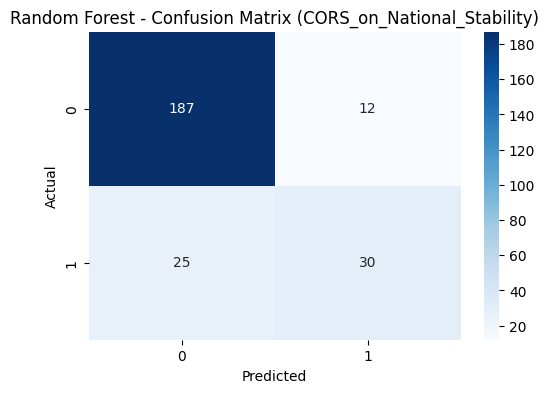

🔍 Random Forest - Confusion Matrix (CORS_on_National_Stability):
          Predicted 0  Predicted 1
Actual 0          187           12
Actual 1           25           30


In [131]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest - Confusion Matrix (CORS_on_National_Stability)")

# Get the confusion matrix in table format
cm = confusion_matrix(y_test, y_pred_rf)

# If your labels are known (e.g., binary classification: 0 and 1)
labels = sorted(list(set(y_test)))  # or use y_test.unique() if it's a pandas Series

# Create a labeled DataFrame
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print the confusion matrix as a table
print("🔍 Random Forest - Confusion Matrix (CORS_on_National_Stability):")
print(cm_df)

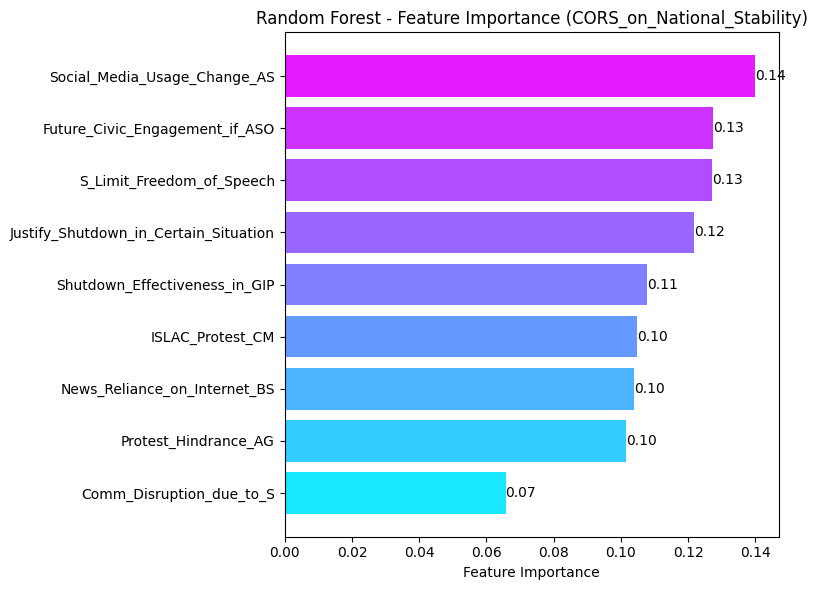


📊Random Forest - Feature Importance (CORS_on_National_Stability):
                              Feature  Importance
         Social_Media_Usage_Change_AS    0.139932
       Future_Civic_Engagement_if_ASO    0.127499
            S_Limit_Freedom_of_Speech    0.127088
Justify_Shutdown_in_Certain_Situation    0.121676
        Shutdown_Effectiveness_in_GIP    0.107875
                     ISLAC_Protest_CM    0.104779
         News_Reliance_on_Internet_BS    0.103843
                 Protest_Hindrance_AG    0.101618
             Comm_Disruption_due_to_S    0.065689


In [132]:
# Feature Importance Plot
plot_feature_importance(best_rf_model.feature_importances_, X.columns, "Random Forest - Feature Importance (CORS_on_National_Stability)")

# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (CORS_on_National_Stability):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display


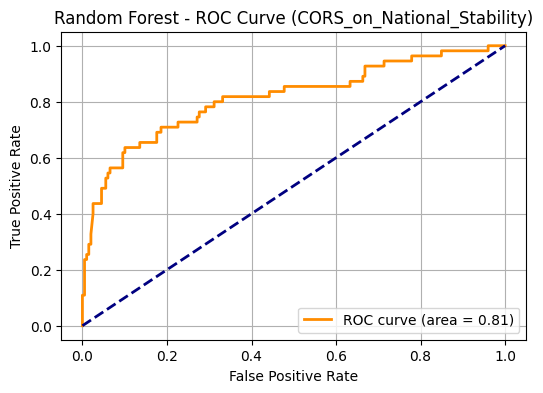

In [133]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_rf_model, "predict_proba"):
    y_proba_rf = best_rf_model.predict_proba(X_test)
    if y_proba_rf.shape[1] > 2:
        # For multi-class: Choose one class vs rest (example: class 1)
        y_score_rf = y_proba_rf[:, 1]
    else:
        y_score_rf = y_proba_rf[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test, y_score_rf, "Random Forest - ROC Curve (CORS_on_National_Stability)")
    
    # Precision-Recall Curve
    #plot_precision_recall(y_test, y_score_rf, "Random Forest - Precision-Recall Curve (CORS_on_National_Stability)")

In [134]:
"""
# --- Learning Curve: Training vs Testing Accuracy ---
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Accuracy')
plt.title('Random Forest - Learning Curve (CORS_on_National_Stability)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
"""

"\n# --- Learning Curve: Training vs Testing Accuracy ---\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(\n    best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,\n    train_sizes=np.linspace(0.1, 1.0, 10)\n)\n\ntrain_scores_mean = np.mean(train_scores, axis=1)\ntest_scores_mean = np.mean(test_scores, axis=1)\n\nplt.figure(figsize=(8,6))\nplt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')\nplt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Accuracy')\nplt.title('Random Forest - Learning Curve (CORS_on_National_Stability)')\nplt.xlabel('Training Set Size')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid()\nplt.show()\n"

Step 5.5.9: XGBoost Model Training + Hyperparameter Tuning (CORS_on_National_Stability)

In [135]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Using softprob for probabilities (needed for AUC, PR curves)
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Define hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb.fit(X_train, y_train)

# Best model from grid search
best_xgb_model = grid_search_xgb.best_estimator_

print("✅ XGBoost tuning complete!")
print("🔹 Best Parameters:", grid_search_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ XGBoost tuning complete!
🔹 Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Step 5.5.10: XGBoost Model Evaluation + All Visualizations (CORS_on_National_Stability)

In [136]:
# XGBoost full evaluation without early stopping (safe for your version)

# Predict on test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Test Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy:.4f}")

# Predict on train set
y_train_pred_xgb = best_xgb_model.predict(X_train)

# Train Accuracy
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb:.4f}")
# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


✅ XGBoost Test Accuracy: 0.8543
✅ XGBoost Train Accuracy: 0.8588

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       199
           1       0.70      0.56      0.63        55

    accuracy                           0.85       254
   macro avg       0.80      0.75      0.77       254
weighted avg       0.85      0.85      0.85       254



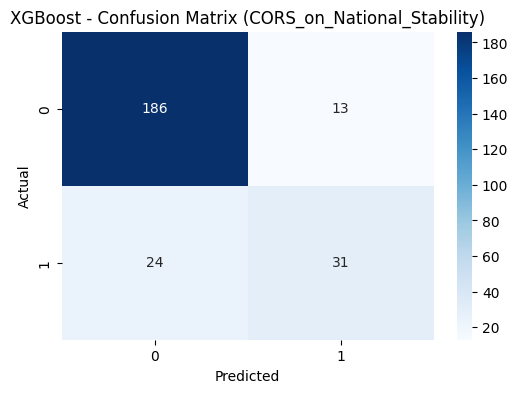

🔍 XGBoost - Confusion Matrix (CORS_on_National_Stability)
          Predicted 0  Predicted 1
Actual 0          186           13
Actual 1           24           31


In [137]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost - Confusion Matrix (CORS_on_National_Stability)")


# Get the confusion matrix in table format
cm = confusion_matrix(y_test, y_pred_xgb)

# If your labels are known (e.g., binary classification: 0 and 1)
labels = sorted(list(set(y_test)))  # or use y_test.unique() if it's a pandas Series

# Create a labeled DataFrame
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print the confusion matrix as a table
print("🔍 XGBoost - Confusion Matrix (CORS_on_National_Stability)")
print(cm_df)



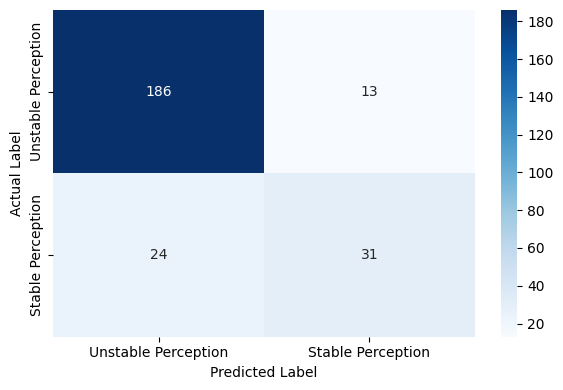

In [138]:
# XGBoost Model Cm (CORS on Stability)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data
data = [[186, 13], [24, 31]]
conf_matrix = pd.DataFrame(data,
                           index=['Unstable Perception', 'Stable Perception'],
                           columns=['Unstable Perception', 'Stable Perception'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
# plt.title('Confusion Matrix (Random Forest - Protest_Hindrance_AG)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()



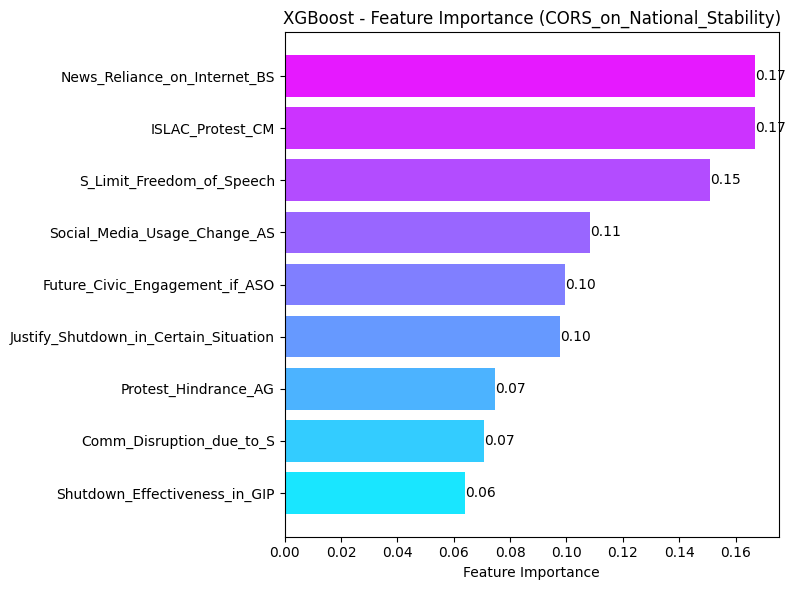


📊XGBoost - Feature Importance (CORS_on_National_Stability):
                              Feature  Importance
         News_Reliance_on_Internet_BS    0.166996
                     ISLAC_Protest_CM    0.166893
            S_Limit_Freedom_of_Speech    0.150940
         Social_Media_Usage_Change_AS    0.108489
       Future_Civic_Engagement_if_ASO    0.099354
Justify_Shutdown_in_Certain_Situation    0.097866
                 Protest_Hindrance_AG    0.074573
             Comm_Disruption_due_to_S    0.070741
        Shutdown_Effectiveness_in_GIP    0.064148


In [139]:
# Feature Importance Plot
plot_feature_importance(best_xgb_model.feature_importances_, X.columns, "XGBoost - Feature Importance (CORS_on_National_Stability)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (CORS_on_National_Stability):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display


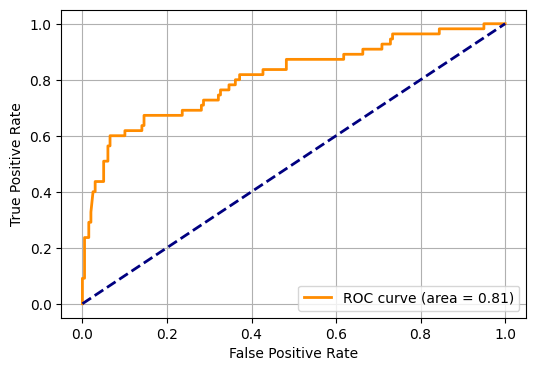

In [140]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_xgb_model, "predict_proba"):
    y_proba_xgb = best_xgb_model.predict_proba(X_test)
    if y_proba_xgb.shape[1] > 2:
        y_score_xgb = y_proba_xgb[:, 1]  # Class 1 probabilities
    else:
        y_score_xgb = y_proba_xgb[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test, y_score_xgb, "") #"XGBoost - ROC Curve (CORS_on_National_Stability)"
    
    # Precision-Recall Curve
    # plot_precision_recall(y_test, y_score_xgb, "XGBoost - Precision-Recall Curve (CORS_on_National_Stability)")


Step 5.5.11: Splitting Data for Second Target Variable (Democracy_Perception_if_SDOA)

In [141]:
# Define features (X2) and new target (y2) for second dependent variable
X2 = df_encoded.drop(columns=['CORS_on_National_Stability', 'Democracy_Perception_if_SDOA', 'ISR_in_GPC_in_Bang'])
y2 = df_encoded['Democracy_Perception_if_SDOA']

# Train/Test split (80% train, 20% test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Show split result
print("✅ Data split completed for Democracy_Perception_if_SDOA!")
print("🔹 X_train2 shape:", X_train2.shape)
print("🔹 X_test2 shape:", X_test2.shape)
print("🔹 y_train2 shape:", y_train2.shape)
print("🔹 y_test2 shape:", y_test2.shape)


✅ Data split completed for Democracy_Perception_if_SDOA!
🔹 X_train2 shape: (1013, 9)
🔹 X_test2 shape: (254, 9)
🔹 y_train2 shape: (1013,)
🔹 y_test2 shape: (254,)


Step 5.5.12: Random Forest Model Training + Hyperparameter Tuning (Democracy_Perception_if_SDOA)

In [142]:
# Define fresh Random Forest model
rf_model2 = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_rf2 = GridSearchCV(
    estimator=rf_model2,
    param_grid=param_grid_rf2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf2.fit(X_train2, y_train2)

# Best model
best_rf_model2 = grid_search_rf2.best_estimator_

print("✅ Random Forest tuning complete for Democracy_Perception_if_SDOA!")
print("🔹 Best Parameters:", grid_search_rf2.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete for Democracy_Perception_if_SDOA!
🔹 Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


Step 5.5.13: Random Forest Evaluation + All Visualizations (Democracy_Perception_if_SDOA)

In [143]:
# Predict
y_pred_rf2 = best_rf_model2.predict(X_test2)

# Test Accuracy
rf_accuracy2 = accuracy_score(y_test2, y_pred_rf2)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy2:.4f}")

# Train Accuracy
y_train_pred_rf2 = best_rf_model2.predict(X_train2)
train_accuracy_rf2 = accuracy_score(y_train2, y_train_pred_rf2)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf2:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test2, y_pred_rf2))

✅ Random Forest Test Accuracy: 0.8228
✅ Random Forest Train Accuracy: 0.9467

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       213
           1       0.39      0.17      0.24        41

    accuracy                           0.82       254
   macro avg       0.62      0.56      0.57       254
weighted avg       0.78      0.82      0.79       254



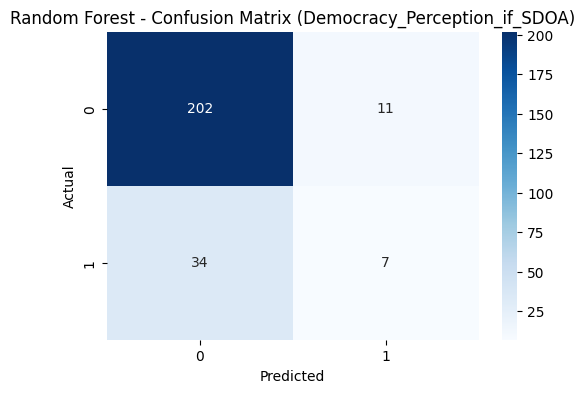

🔍 Random Forest - Confusion Matrix (Democracy_Perception_if_SDOA):
          Predicted 0  Predicted 1
Actual 0          202           11
Actual 1           34            7


In [144]:
# Confusion Matrix
plot_confusion_matrix(y_test2, y_pred_rf2, "Random Forest - Confusion Matrix (Democracy_Perception_if_SDOA)")


# Get the confusion matrix in table format
cm = confusion_matrix(y_test2, y_pred_rf2)

# If your labels are known (e.g., binary classification: 0 and 1)
labels = sorted(list(set(y_test)))  # or use y_test.unique() if it's a pandas Series

# Create a labeled DataFrame
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print the confusion matrix as a table
print("🔍 Random Forest - Confusion Matrix (Democracy_Perception_if_SDOA):")
print(cm_df)

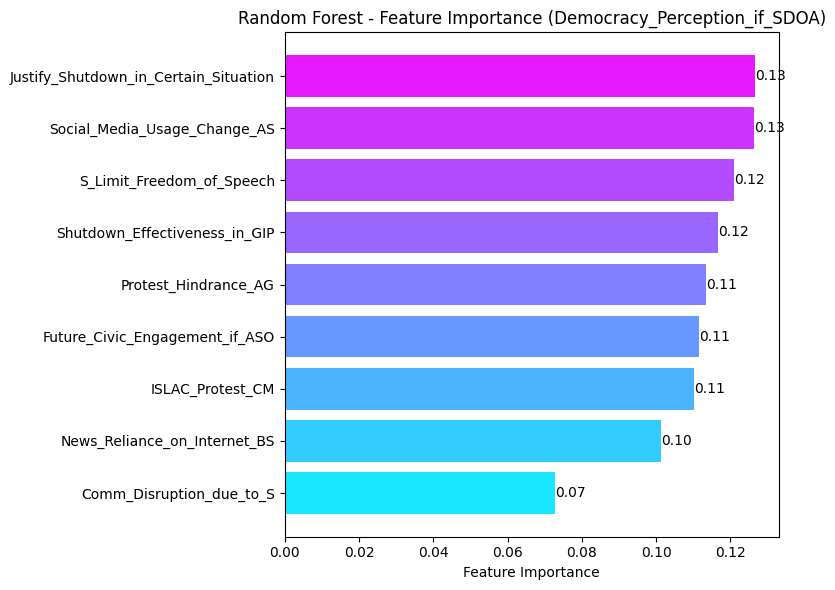


📊Random Forest - Feature Importance (Democracy_Perception_if_SDOA):
                              Feature  Importance
Justify_Shutdown_in_Certain_Situation    0.126705
         Social_Media_Usage_Change_AS    0.126355
            S_Limit_Freedom_of_Speech    0.121033
        Shutdown_Effectiveness_in_GIP    0.116656
                 Protest_Hindrance_AG    0.113453
       Future_Civic_Engagement_if_ASO    0.111507
                     ISLAC_Protest_CM    0.110152
         News_Reliance_on_Internet_BS    0.101369
             Comm_Disruption_due_to_S    0.072770


In [145]:
# Feature Importance
plot_feature_importance(best_rf_model2.feature_importances_, X2.columns, "Random Forest - Feature Importance (Democracy_Perception_if_SDOA)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (Democracy_Perception_if_SDOA):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

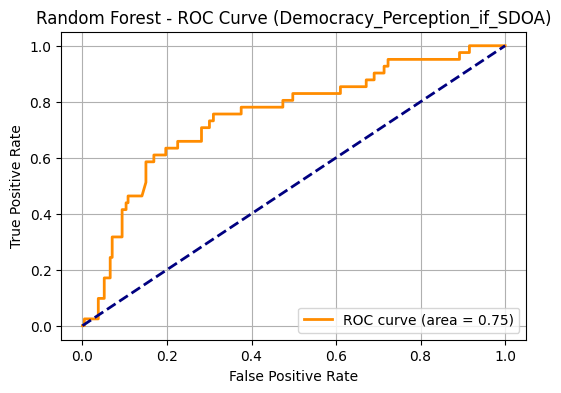

In [146]:
# Probabilities for ROC and PR curves
if hasattr(best_rf_model2, "predict_proba"):
    y_proba_rf2 = best_rf_model2.predict_proba(X_test2)
    if y_proba_rf2.shape[1] > 2:
        y_score_rf2 = y_proba_rf2[:, 1]
    else:
        y_score_rf2 = y_proba_rf2[:, 1]
        
    plot_roc_auc(y_test2, y_score_rf2, "Random Forest - ROC Curve (Democracy_Perception_if_SDOA)")
    # plot_precision_recall(y_test2, y_score_rf2, "Random Forest - Precision-Recall Curve (Democracy_Perception_if_SDOA)")


Step 5.5.14: XGBoost Model Training + Hyperparameter Tuning (Democracy_Perception_if_SDOA)

In [147]:
# Define fresh XGBoost model
xgb_model2 = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Define hyperparameter grid
param_grid_xgb2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search_xgb2 = GridSearchCV(
    estimator=xgb_model2,
    param_grid=param_grid_xgb2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb2.fit(X_train2, y_train2)

# Best model
best_xgb_model2 = grid_search_xgb2.best_estimator_

print("✅ XGBoost tuning complete for Democracy_Perception_if_SDOA!")
print("🔹 Best Parameters:", grid_search_xgb2.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ XGBoost tuning complete for Democracy_Perception_if_SDOA!
🔹 Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


Step 5.5.15: XGBoost Evaluation (Democracy_Perception_if_SDOA)

In [148]:
# Predict
y_pred_xgb2 = best_xgb_model2.predict(X_test2)

# Test Accuracy
xgb_accuracy2 = accuracy_score(y_test2, y_pred_xgb2)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy2:.4f}")

# Train Accuracy
y_train_pred_xgb2 = best_xgb_model2.predict(X_train2)
train_accuracy_xgb2 = accuracy_score(y_train2, y_train_pred_xgb2)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb2:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test2, y_pred_xgb2))

✅ XGBoost Test Accuracy: 0.8189
✅ XGBoost Train Accuracy: 0.8993

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       213
           1       0.35      0.15      0.21        41

    accuracy                           0.82       254
   macro avg       0.60      0.55      0.55       254
weighted avg       0.77      0.82      0.79       254



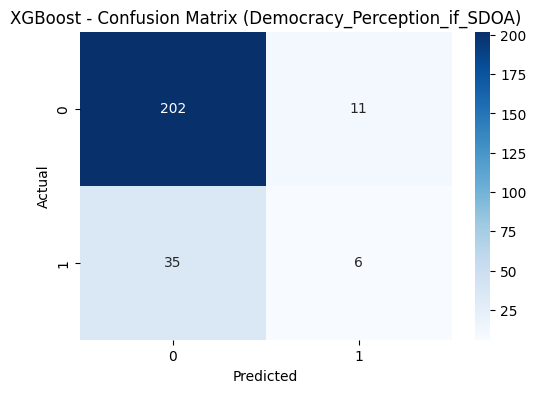

🔍 XGBoost - Confusion Matrix (Democracy_Perception_if_SDOA):
          Predicted 0  Predicted 1
Actual 0          202           11
Actual 1           35            6


In [149]:
# Confusion Matrix
plot_confusion_matrix(y_test2, y_pred_xgb2, "XGBoost - Confusion Matrix (Democracy_Perception_if_SDOA)")


# Get the confusion matrix in table format
cm = confusion_matrix(y_test2, y_pred_xgb2)

# If your labels are known (e.g., binary classification: 0 and 1)
labels = sorted(list(set(y_test)))  # or use y_test.unique() if it's a pandas Series

# Create a labeled DataFrame
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print the confusion matrix as a table
print("🔍 XGBoost - Confusion Matrix (Democracy_Perception_if_SDOA):")
print(cm_df)

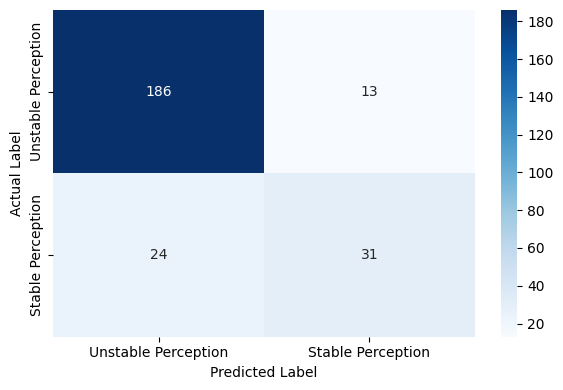

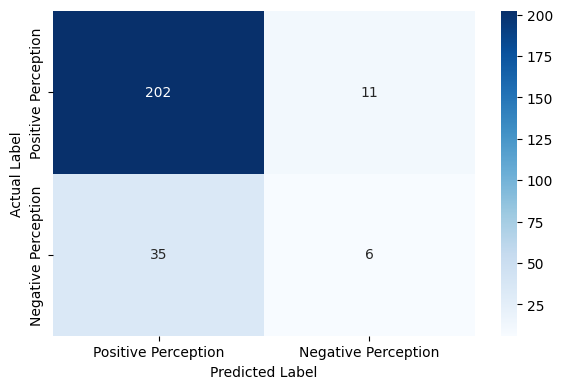

In [150]:
# XGBoost Model Cm (CORS on Stability)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data
data = [[186, 13], [24, 31]]
conf_matrix = pd.DataFrame(data,
                           index=['Unstable Perception', 'Stable Perception'],
                           columns=['Unstable Perception', 'Stable Perception'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
# plt.title('Confusion Matrix (Random Forest - Protest_Hindrance_AG)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


# XGBoost Model Cm (Democracy perception)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data
data = [[202, 11], [35, 6]]
conf_matrix = pd.DataFrame(data,
                           index=['Positive Perception', 'Negative Perception'],
                           columns=['Positive Perception', 'Negative Perception'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
# plt.title('Confusion Matrix (Random Forest - Protest_Hindrance_AG)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()



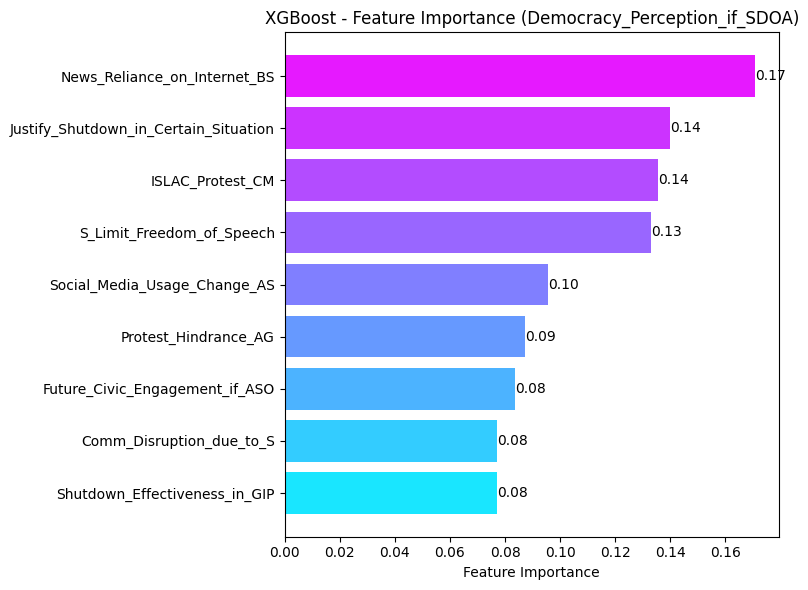


📊XGBoost - Feature Importance (Democracy_Perception_if_SDOA):
                              Feature  Importance
         News_Reliance_on_Internet_BS    0.170834
Justify_Shutdown_in_Certain_Situation    0.139883
                     ISLAC_Protest_CM    0.135477
            S_Limit_Freedom_of_Speech    0.133052
         Social_Media_Usage_Change_AS    0.095713
                 Protest_Hindrance_AG    0.087149
       Future_Civic_Engagement_if_ASO    0.083658
             Comm_Disruption_due_to_S    0.077159
        Shutdown_Effectiveness_in_GIP    0.077076


In [151]:
# Feature Importance
plot_feature_importance(best_xgb_model2.feature_importances_, X2.columns, "XGBoost - Feature Importance (Democracy_Perception_if_SDOA)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (Democracy_Perception_if_SDOA):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

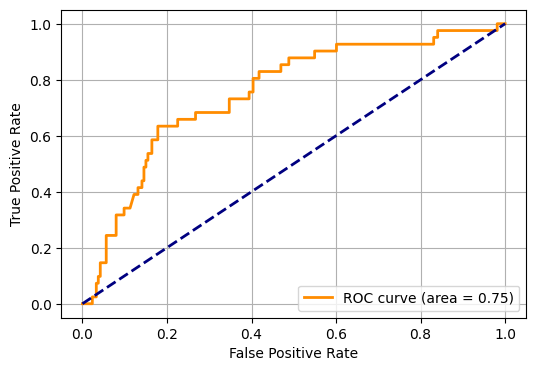

In [152]:
# Probabilities for ROC and PR curves
if hasattr(best_xgb_model2, "predict_proba"):
    y_proba_xgb2 = best_xgb_model2.predict_proba(X_test2)
    if y_proba_xgb2.shape[1] > 2:
        y_score_xgb2 = y_proba_xgb2[:, 1]
    else:
        y_score_xgb2 = y_proba_xgb2[:, 1]
        
    plot_roc_auc(y_test2, y_score_xgb2, "") #XGBoost - ROC Curve (Democracy_Perception_if_SDOA)
    # plot_precision_recall(y_test2, y_score_xgb2, "XGBoost - Precision-Recall Curve (Democracy_Perception_if_SDOA)")


Step 5.5.16: Splitting Data for Third Target Variable (ISR_in_GPC_in_Bang)

In [153]:
# Define features (X3) and new target (y3) for third dependent variable
X3 = df_encoded.drop(columns=['CORS_on_National_Stability', 'Democracy_Perception_if_SDOA', 'ISR_in_GPC_in_Bang'])
y3 = df_encoded['ISR_in_GPC_in_Bang']

# Train/Test split (80% train, 20% test)
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.2, random_state=42, stratify=y3
)

# Show split result
print("✅ Data split completed for ISR_in_GPC_in_Bang!")
print("🔹 X_train3 shape:", X_train3.shape)
print("🔹 X_test3 shape:", X_test3.shape)
print("🔹 y_train3 shape:", y_train3.shape)
print("🔹 y_test3 shape:", y_test3.shape)


✅ Data split completed for ISR_in_GPC_in_Bang!
🔹 X_train3 shape: (1013, 9)
🔹 X_test3 shape: (254, 9)
🔹 y_train3 shape: (1013,)
🔹 y_test3 shape: (254,)


Step 5.5.17: Random Forest Model Training + Hyperparameter Tuning (ISR_in_GPC_in_Bang)

In [154]:
# Define fresh Random Forest model for third target
rf_model3 = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search_rf3 = GridSearchCV(
    estimator=rf_model3,
    param_grid=param_grid_rf3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf3.fit(X_train3, y_train3)

# Best model from grid search
best_rf_model3 = grid_search_rf3.best_estimator_

print("✅ Random Forest tuning complete for ISR_in_GPC_in_Bang!")
print("🔹 Best Parameters:", grid_search_rf3.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete for ISR_in_GPC_in_Bang!
🔹 Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


Step 5.5.18: Random Forest Evaluation + All Visualizations (ISR_in_GPC_in_Bang)

In [155]:
# Predict on test set
y_pred_rf3 = best_rf_model3.predict(X_test3)

# Test Accuracy
rf_accuracy3 = accuracy_score(y_test3, y_pred_rf3)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy3:.4f}")

# Predict on train set
y_train_pred_rf3 = best_rf_model3.predict(X_train3)

# Train Accuracy
train_accuracy_rf3 = accuracy_score(y_train3, y_train_pred_rf3)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf3:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test3, y_pred_rf3))

✅ Random Forest Test Accuracy: 0.6969
✅ Random Forest Train Accuracy: 0.8016

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.50      0.57       104
           1       0.71      0.83      0.76       150

    accuracy                           0.70       254
   macro avg       0.69      0.67      0.67       254
weighted avg       0.69      0.70      0.69       254



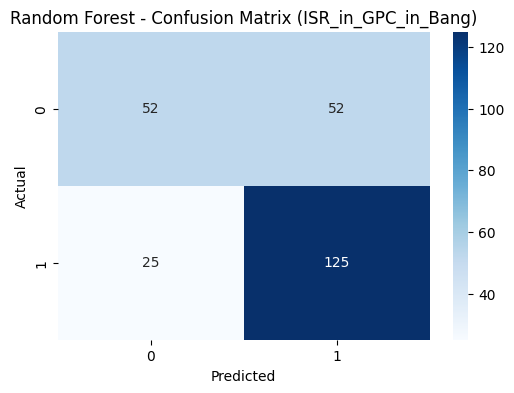

🔍 Random Forest - Confusion Matrix (ISR_in_GPC_in_Bang):
          Predicted 0  Predicted 1
Actual 0           52           52
Actual 1           25          125


In [156]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test3, y_pred_rf3, "Random Forest - Confusion Matrix (ISR_in_GPC_in_Bang)")

# Get the confusion matrix in table format
cm = confusion_matrix(y_test3, y_pred_rf3)

# If your labels are known (e.g., binary classification: 0 and 1)
labels = sorted(list(set(y_test)))  # or use y_test.unique() if it's a pandas Series

# Create a labeled DataFrame
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print the confusion matrix as a table
print("🔍 Random Forest - Confusion Matrix (ISR_in_GPC_in_Bang):")
print(cm_df)

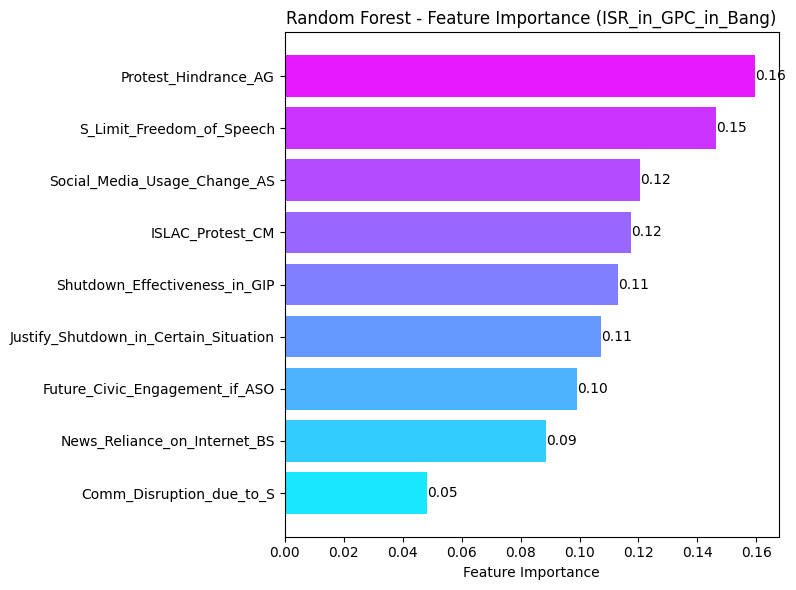


📊Random Forest - Feature Importance (ISR_in_GPC_in_Bang):
                              Feature  Importance
                 Protest_Hindrance_AG    0.159579
            S_Limit_Freedom_of_Speech    0.146252
         Social_Media_Usage_Change_AS    0.120567
                     ISLAC_Protest_CM    0.117523
        Shutdown_Effectiveness_in_GIP    0.113024
Justify_Shutdown_in_Certain_Situation    0.107214
       Future_Civic_Engagement_if_ASO    0.099067
         News_Reliance_on_Internet_BS    0.088580
             Comm_Disruption_due_to_S    0.048195


In [157]:
# Feature Importance Plot
plot_feature_importance(best_rf_model3.feature_importances_, X3.columns, "Random Forest - Feature Importance (ISR_in_GPC_in_Bang)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (ISR_in_GPC_in_Bang):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

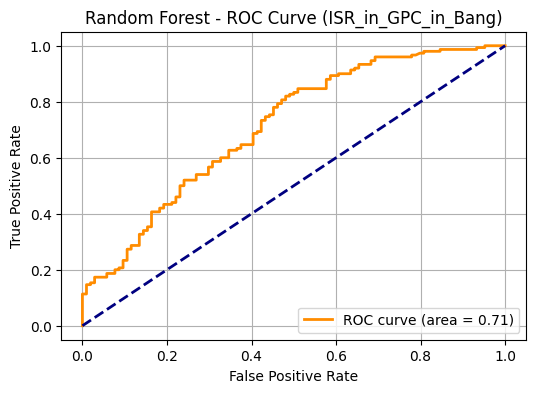

In [158]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_rf_model3, "predict_proba"):
    y_proba_rf3 = best_rf_model3.predict_proba(X_test3)
    if y_proba_rf3.shape[1] > 2:
        y_score_rf3 = y_proba_rf3[:, 1]  # Class 1 probabilities
    else:
        y_score_rf3 = y_proba_rf3[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test3, y_score_rf3, "Random Forest - ROC Curve (ISR_in_GPC_in_Bang)")
    
    # Precision-Recall Curve
    # plot_precision_recall(y_test3, y_score_rf3, "Random Forest - Precision-Recall Curve (ISR_in_GPC_in_Bang)")

In [159]:
"""

# --- Learning Curve: Training vs Testing Accuracy ---
from sklearn.model_selection import learning_curve

train_sizes3, train_scores3, test_scores3 = learning_curve(
    best_rf_model3, X3, y3, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean3 = np.mean(train_scores3, axis=1)
test_scores_mean3 = np.mean(test_scores3, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes3, train_scores_mean3, 'o-', label='Training Accuracy')
plt.plot(train_sizes3, test_scores_mean3, 'o-', label='Testing Accuracy')
plt.title('Random Forest - Learning Curve (ISR_in_GPC_in_Bang)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
"""

"\n\n# --- Learning Curve: Training vs Testing Accuracy ---\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes3, train_scores3, test_scores3 = learning_curve(\n    best_rf_model3, X3, y3, cv=5, scoring='accuracy', n_jobs=-1,\n    train_sizes=np.linspace(0.1, 1.0, 10)\n)\n\ntrain_scores_mean3 = np.mean(train_scores3, axis=1)\ntest_scores_mean3 = np.mean(test_scores3, axis=1)\n\nplt.figure(figsize=(8,6))\nplt.plot(train_sizes3, train_scores_mean3, 'o-', label='Training Accuracy')\nplt.plot(train_sizes3, test_scores_mean3, 'o-', label='Testing Accuracy')\nplt.title('Random Forest - Learning Curve (ISR_in_GPC_in_Bang)')\nplt.xlabel('Training Set Size')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid()\nplt.show()\n"

Step 5.5.19: XGBoost Model Training + Hyperparameter Tuning (ISR_in_GPC_in_Bang)

In [160]:
# Define fresh XGBoost model for third target
xgb_model3 = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Define hyperparameter grid
param_grid_xgb3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search_xgb3 = GridSearchCV(
    estimator=xgb_model3,
    param_grid=param_grid_xgb3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb3.fit(X_train3, y_train3)

# Best model from grid search
best_xgb_model3 = grid_search_xgb3.best_estimator_

print("✅ XGBoost tuning complete for ISR_in_GPC_in_Bang!")
print("🔹 Best Parameters:", grid_search_xgb3.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ XGBoost tuning complete for ISR_in_GPC_in_Bang!
🔹 Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


Step 5.5.20: XGBoost Model Evaluation + All Visualizations (ISR_in_GPC_in_Bang)

In [161]:
# Predict on test set
y_pred_xgb3 = best_xgb_model3.predict(X_test3)

# Test Accuracy
xgb_accuracy3 = accuracy_score(y_test3, y_pred_xgb3)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy3:.4f}")

# Predict on train set
y_train_pred_xgb3 = best_xgb_model3.predict(X_train3)

# Train Accuracy
train_accuracy_xgb3 = accuracy_score(y_train3, y_train_pred_xgb3)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb3:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test3, y_pred_xgb3))

✅ XGBoost Test Accuracy: 0.6772
✅ XGBoost Train Accuracy: 0.7769

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.38      0.49       104
           1       0.67      0.89      0.76       150

    accuracy                           0.68       254
   macro avg       0.68      0.63      0.63       254
weighted avg       0.68      0.68      0.65       254



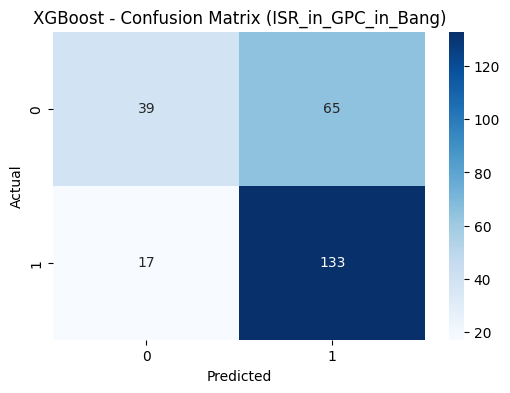

🔍 XGBoost - Confusion Matrix (ISR_in_GPC_in_Bang)
          Predicted 0  Predicted 1
Actual 0           39           65
Actual 1           17          133


In [162]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test3, y_pred_xgb3, "XGBoost - Confusion Matrix (ISR_in_GPC_in_Bang)")

# Get the confusion matrix in table format
cm = confusion_matrix(y_test3, y_pred_xgb3)

# If your labels are known (e.g., binary classification: 0 and 1)
labels = sorted(list(set(y_test)))  # or use y_test.unique() if it's a pandas Series

# Create a labeled DataFrame
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print the confusion matrix as a table
print("🔍 XGBoost - Confusion Matrix (ISR_in_GPC_in_Bang)")
print(cm_df)

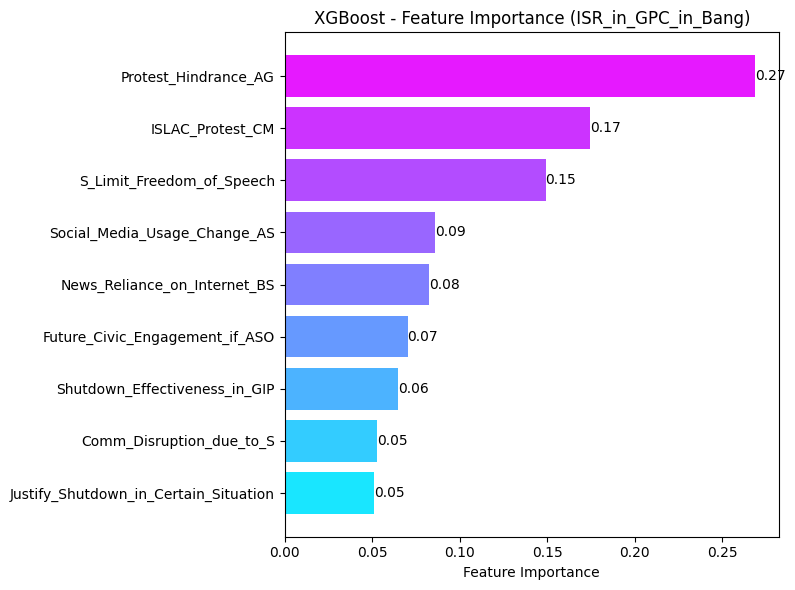


📊XGBoost - Feature Importance (ISR_in_GPC_in_Bang):
                              Feature  Importance
                 Protest_Hindrance_AG    0.269083
                     ISLAC_Protest_CM    0.174399
            S_Limit_Freedom_of_Speech    0.149100
         Social_Media_Usage_Change_AS    0.085968
         News_Reliance_on_Internet_BS    0.082531
       Future_Civic_Engagement_if_ASO    0.070223
        Shutdown_Effectiveness_in_GIP    0.064873
             Comm_Disruption_due_to_S    0.052629
Justify_Shutdown_in_Certain_Situation    0.051194


In [163]:
# Feature Importance Plot
plot_feature_importance(best_xgb_model3.feature_importances_, X3.columns, "XGBoost - Feature Importance (ISR_in_GPC_in_Bang)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (ISR_in_GPC_in_Bang):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

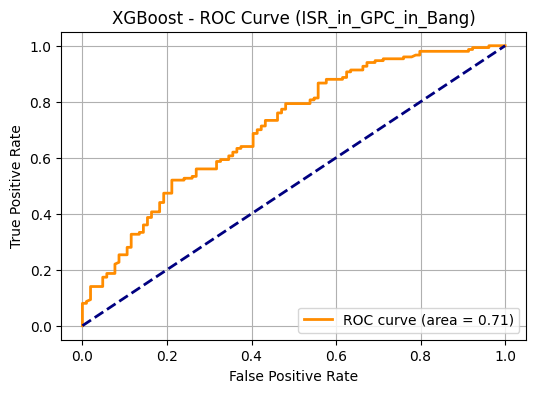

In [164]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_xgb_model3, "predict_proba"):
    y_proba_xgb3 = best_xgb_model3.predict_proba(X_test3)
    if y_proba_xgb3.shape[1] > 2:
        y_score_xgb3 = y_proba_xgb3[:, 1]  # Class 1 probabilities
    else:
        y_score_xgb3 = y_proba_xgb3[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test3, y_score_xgb3, "XGBoost - ROC Curve (ISR_in_GPC_in_Bang)")
    
    # Precision-Recall Curve
    # plot_precision_recall(y_test3, y_score_xgb3, "XGBoost - Precision-Recall Curve (ISR_in_GPC_in_Bang)")


Step 5.5.21: Summary table of all models

In [165]:
# Define the data manually (put your accuracy numbers here!)
summary_data = {
    'Target Variable': [
        'CORS_on_National_Stability', 'CORS_on_National_Stability',
        'Democracy_Perception_if_SDOA', 'Democracy_Perception_if_SDOA',
        'ISR_in_GPC_in_Bang', 'ISR_in_GPC_in_Bang'
    ],
    'Model': [
        'Random Forest', 'XGBoost',
        'Random Forest', 'XGBoost',
        'Random Forest', 'XGBoost'
    ],
    'Train Accuracy': [
        train_accuracy_rf, train_accuracy_xgb,
        train_accuracy_rf2, train_accuracy_xgb2,
        train_accuracy_rf3, train_accuracy_xgb3
    ],
    'Test Accuracy': [
        rf_accuracy, xgb_accuracy,
        rf_accuracy2, xgb_accuracy2,
        rf_accuracy3, xgb_accuracy3
    ]
}

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Display table
print("✅ Model Summary Table:")
display(summary_df)

# Optionally: Save it to Excel if you want
#summary_df.to_excel("Model_Summary_Table.xlsx", index=False)
#print("✅ Saved to Model_Summary_Table.xlsx!")

✅ Model Summary Table:


Target Variable          Model  Train Accuracy  Test Accuracy
0    CORS_on_National_Stability  Random Forest        0.951629       0.854331
1    CORS_on_National_Stability        XGBoost        0.858835       0.854331
2  Democracy_Perception_if_SDOA  Random Forest        0.946693       0.822835
3  Democracy_Perception_if_SDOA        XGBoost        0.899309       0.818898
4            ISR_in_GPC_in_Bang  Random Forest        0.801579       0.696850
5            ISR_in_GPC_in_Bang        XGBoost        0.776900       0.677165

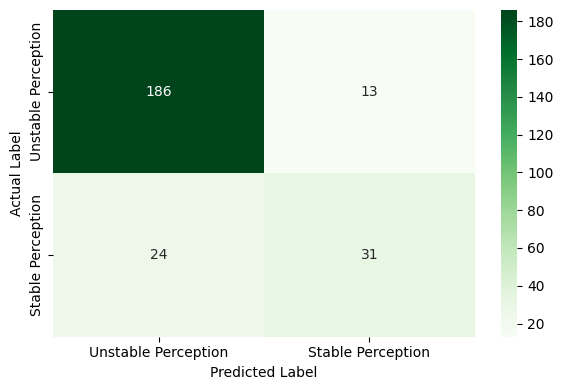

In [166]:
# XGBoost Model Cm (CORS on Stability)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data
data = [[186, 13], [24, 31]]
conf_matrix = pd.DataFrame(data,
                           index=['Unstable Perception', 'Stable Perception'],
                           columns=['Unstable Perception', 'Stable Perception'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
# plt.title('Confusion Matrix (Random Forest - Protest_Hindrance_AG)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()



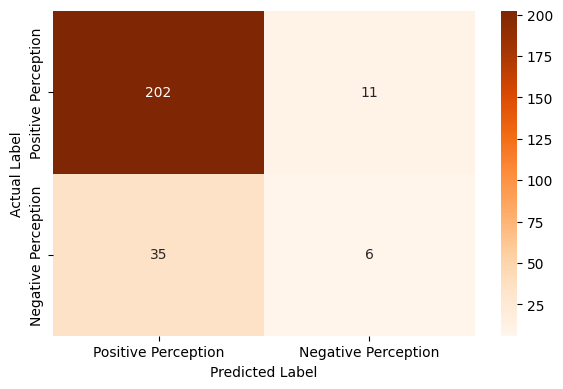

In [167]:

# XGBoost Model Cm (Democracy perception)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data
data = [[202, 11], [35, 6]]
conf_matrix = pd.DataFrame(data,
                           index=['Positive Perception', 'Negative Perception'],
                           columns=['Positive Perception', 'Negative Perception'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=True)
# plt.title('Confusion Matrix (Random Forest - Protest_Hindrance_AG)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()



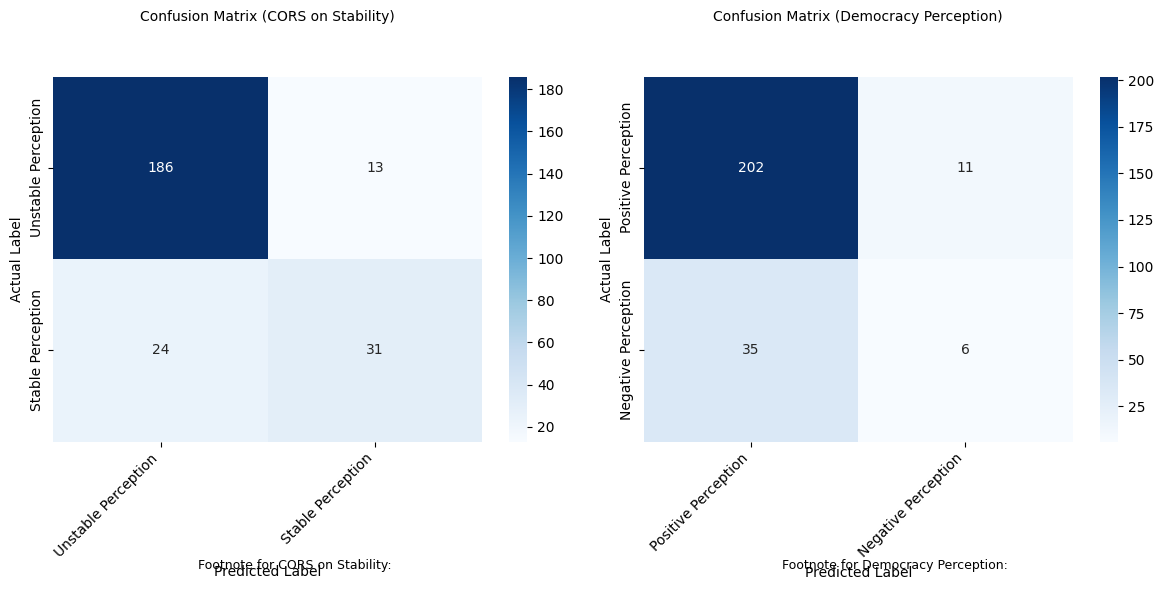

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data for CORSONS (Consequence of Repeated Shutdown on National Stability)
data_corsons = [[186, 13], [24, 31]]
conf_matrix_corsons = pd.DataFrame(data_corsons,
                                   index=['Unstable Perception', 'Stable Perception'],
                                   columns=['Unstable Perception', 'Stable Perception'])

# Create confusion matrix data for DPISOA (Democracy Perception If Shutdown Occurs Again)
data_dpisoa = [[202, 11], [35, 6]]
conf_matrix_dpisoa = pd.DataFrame(data_dpisoa,
                                  index=['Positive Perception', 'Negative Perception'],
                                  columns=['Positive Perception', 'Negative Perception'])

# Create a single figure with two subplots and titles at the bottom
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for CORSONS
sns.heatmap(conf_matrix_corsons, annot=True, fmt='d', cmap='Blues', cbar=True, ax=axes[0])
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Plot the confusion matrix for DPISOA
sns.heatmap(conf_matrix_dpisoa, annot=True, fmt='d', cmap='Blues', cbar=True, ax=axes[1])
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

# Move titles to the bottom
axes[0].set_title('Confusion Matrix (CORS on Stability)', fontsize=10, pad=40)
axes[1].set_title('Confusion Matrix (Democracy Perception)', fontsize=10, pad=40)

# Add footnotes below each subplot using fig.text()
fig.text(0.25, 0.05, "Footnote for CORS on Stability:", ha='center', va='center', fontsize=9)
fig.text(0.75, 0.05, "Footnote for Democracy Perception:", ha='center', va='center', fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


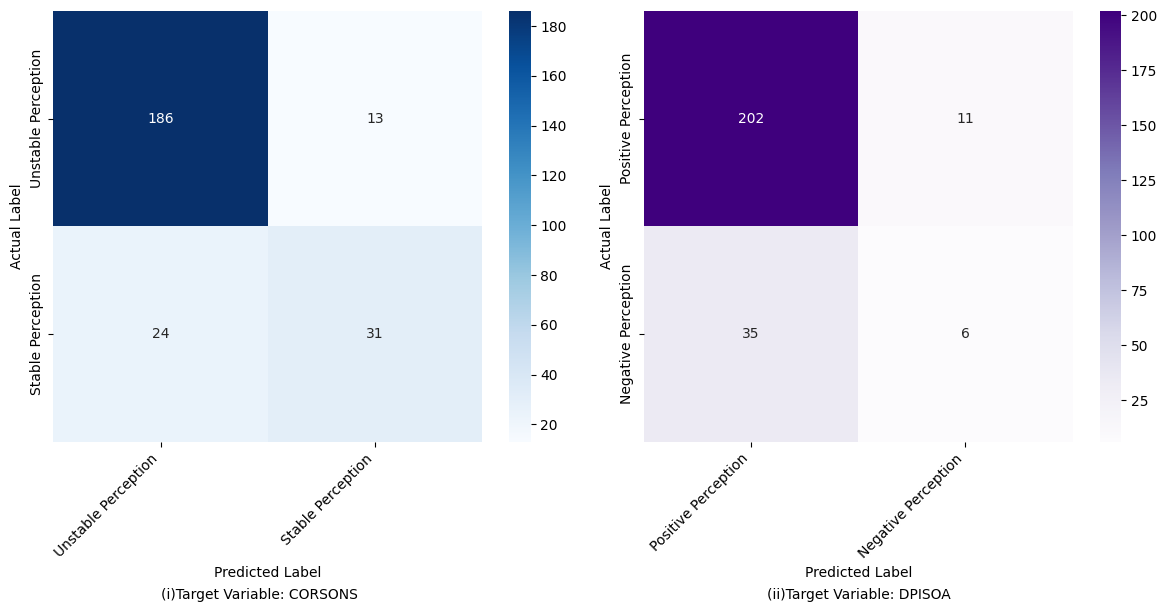

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data for CORSONS (Consequence of Repeated Shutdown on National Stability)
data_corsons = [[186, 13], [24, 31]]
conf_matrix_corsons = pd.DataFrame(data_corsons,
                                   index=['Unstable Perception', 'Stable Perception'],
                                   columns=['Unstable Perception', 'Stable Perception'])

# Create confusion matrix data for DPISOA (Democracy Perception If Shutdown Occurs Again)
data_dpisoa = [[202, 11], [35, 6]]
conf_matrix_dpisoa = pd.DataFrame(data_dpisoa,
                                  index=['Positive Perception', 'Negative Perception'],
                                  columns=['Positive Perception', 'Negative Perception'])

# Create a single figure with two subplots and titles at the bottom
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for CORSONS
sns.heatmap(conf_matrix_corsons, annot=True, fmt='d', cmap='Blues', cbar=True, ax=axes[0])
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Plot the confusion matrix for DPISOA
sns.heatmap(conf_matrix_dpisoa, annot=True, fmt='d', cmap='Purples', cbar=True, ax=axes[1])
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

# Move titles to the bottom
#axes[0].set_title('Confusion Matrix (CORS on Stability)', fontsize=10, pad=40)
#axes[1].set_title('Confusion Matrix (Democracy Perception)', fontsize=10, pad=40)

# Add footnotes below each subplot using fig.text()
fig.text(0.22, 0.0003, "(i)Target Variable: CORSONS", ha='center', va='center')
fig.text(0.72, 0.0003, "(ii)Target Variable: DPISOA", ha='center', va='center')

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()
